Sumber text clustering using NLTK library: https://github.com/lucas-de-sa/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb

Sumber text clustering using Spacy library: https://github.com/kirralabs/text-clustering/blob/master/script/core/Clustering.ipynb

Sumber data prep: https://github.com/galuhsahid/data-preparation-with-python/blob/master/01_DataPreparationWithPython.ipynb

# A. Import Library

In [1]:
import os, mpld3, nltk
import numpy as np
import pandas as pd
import re

In [2]:
from spacy.lang.id import Indonesian
import fnmatch

nlp = Indonesian()
def tokenize_and_stem(text):
    text = u'{}'.format(text)
    doc = nlp(text)
    stems = [t.lemma_ for t in doc]
    stems = [t.lower() for t in stems]
    return stems


def tokenize_only(text):
    text = u'{}'.format(text)
    doc = nlp(text)
    stems = [t.text for t in doc]
    stems = [t.lower() for t in stems]
    return stems

# B. Import Dataset

In [3]:
data_raw = pd.read_csv('~/Downloads/data-ticket-karyawan.csv', encoding='utf-8')
data_raw.columns = map(str.lower, data_raw.columns) #membuat huruf awal nama kolom menjadi tidak kapital

sumber = ['Lapor PPDB']
data_raw = data_raw.loc[data_raw['sumber'].isin(sumber)]
data_raw.head(6)

sumber tahun bulan  issue id  tracker           created on  \
0  Lapor PPDB     2024-06     21639  Support  2024-06-29 09:09:00   
1  Lapor PPDB     2024-06     21662  Support  2024-06-29 12:51:50   
2  Lapor PPDB     2024-06     21088  Support  2024-06-22 05:30:34   
3  Lapor PPDB     2024-06     21689  Support  2024-07-01 02:28:58   
4  Lapor PPDB     2024-06     21479  Support  2024-06-26 14:13:47   
5  Lapor PPDB     2024-06     21680  Support  2024-06-30 19:56:25   

             closed on  start date    due date                    project  \
0  2024-07-01 05:11:11  2024-06-29  2024-06-29              Kota Denpasar   
1  2024-07-01 05:10:57  2024-06-29  2024-06-29                 Prov. Bali   
2  2024-06-22 10:18:51  2024-06-22  2024-06-29  Prov. Nusa Tenggara Timur   
3  2024-07-01 02:46:11  2024-06-30  2024-07-01   Kanwil Prov. DKI Jakarta   
4  2024-07-01 01:27:33  2024-06-26  2024-06-26              Kota Sukabumi   
5  2024-06-30 22:43:27  2024-06-30  2024-06-30                Kota Serang   

                                             subject   state  poin  \
0  [Closing Engine] Kota Denpasar 2024 - Jalur Zo...  Closed   NaN   
1  [Kendala] Siswa Masih Bisa Langsung Pengajuan ...  Closed   NaN   
2  [Closing Engine] Prov NTT 2024 - SMA All Jalur...  Closed   NaN   
3  [DEV] Pengecekan dan Penyesuaian hasil seleksi...  Closed   5.0   
4  Pengecekan File Ajuan Pendaftaran di Operator ...  Closed   NaN   
5  [DEV] Backend - Tolak Pilihan Provinsi Dan Kot...  Closed   1.0   

   id resolver          nama resolver grup resolver  id creator  \
0         69.0  Febrian Hilmi Firdaus           DSO          69   
1         69.0  Febrian Hilmi Firdaus           DSO          69   
2         69.0  Febrian Hilmi Firdaus           DSO          69   
3          4.0          Azhar Mashuri           DIP           4   
4         74.0                Hayan .           DSO          74   
5         62.0            Villa Nanda           DIP           4   

            nama creator  ts menit         wkt resolved st lembur  
0  Febrian Hilmi Firdaus       NaN  2024-06-29 14:30:41    Lembur  
1  Febrian Hilmi Firdaus       NaN  2024-07-01 05:10:57    Normal  
2  Febrian Hilmi Firdaus       NaN  2024-06-22 08:54:49    Normal  
3          Azhar Mashuri       NaN  2024-07-01 02:46:06    Lembur  
4                Hayan .       NaN  2024-06-26 14:24:31    Normal  
5          Azhar Mashuri       NaN  2024-06-30 21:41:11    Lembur

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2036 entries, 0 to 2035
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sumber         2036 non-null   object 
 1   tahun bulan    2036 non-null   object 
 2   issue id       2036 non-null   int64  
 3   tracker        2036 non-null   object 
 4   created on     2036 non-null   object 
 5   closed on      2036 non-null   object 
 6   start date     1630 non-null   object 
 7   due date       2036 non-null   object 
 8   project        2036 non-null   object 
 9   subject        2036 non-null   object 
 10  state          2036 non-null   object 
 11  poin           1712 non-null   float64
 12  id resolver    2036 non-null   float64
 13  nama resolver  2036 non-null   object 
 14  grup resolver  1952 non-null   object 
 15  id creator     2036 non-null   int64  
 16  nama creator   2036 non-null   object 
 17  ts menit       371 non-null    float64
 18  wkt resolved 

# Pilih Kolom

In [5]:
data_subj = data_raw['subject']

data =  data_raw['subject']
data

0       [Closing Engine] Kota Denpasar 2024 - Jalur Zo...
1       [Kendala] Siswa Masih Bisa Langsung Pengajuan ...
2       [Closing Engine] Prov NTT 2024 - SMA All Jalur...
3       [DEV] Pengecekan dan Penyesuaian hasil seleksi...
4       Pengecekan File Ajuan Pendaftaran di Operator ...
                              ...                        
2031    Reset daftar Ajuan Pendaftaran Gabungan zona Demo
2032                    Override Engine Seleksi Kota Batu
2033       Dokumen SPH PPDB Online Kota Palangkaraya 2023
2034    Override Info Dari Formatter Kapasitas Jika Ya...
2035                 Konfirmasi daerah 3 Kota/Kab di TR I
Name: subject, Length: 2036, dtype: object

In [6]:
data.values #Menjadikan array

array(['[Closing Engine] Kota Denpasar 2024 - Jalur Zonasi Kategori Umum - Tahap 1',
       '[Kendala] Siswa Masih Bisa Langsung Pengajuan Pendaftaran di 2 Jenjang Sekaligus',
       '[Closing Engine] Prov NTT 2024 - SMA All Jalur - Tahap 1', ...,
       'Dokumen SPH PPDB Online Kota Palangkaraya 2023',
       'Override Info Dari Formatter Kapasitas Jika Yang Diakses Adalah Kota Batu',
       'Konfirmasi daerah 3 Kota/Kab di TR I'], dtype=object)

# Cleaning data

In [7]:
#Mengubah huruf kapital menjadi lower case
data = data.str.lower()
data

0       [closing engine] kota denpasar 2024 - jalur zo...
1       [kendala] siswa masih bisa langsung pengajuan ...
2       [closing engine] prov ntt 2024 - sma all jalur...
3       [dev] pengecekan dan penyesuaian hasil seleksi...
4       pengecekan file ajuan pendaftaran di operator ...
                              ...                        
2031    reset daftar ajuan pendaftaran gabungan zona demo
2032                    override engine seleksi kota batu
2033       dokumen sph ppdb online kota palangkaraya 2023
2034    override info dari formatter kapasitas jika ya...
2035                 konfirmasi daerah 3 kota/kab di tr i
Name: subject, Length: 2036, dtype: object

In [8]:
def clean_text(text):
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r"\b(2024|2023|ppdb)\b", "", text)
    text = re.sub(r"\b(kota|kab|kabupaten|prov|provinsi|kotakab|diy|daerah)\b", "", text)
    text = re.sub(r"\b(balikpapan|bontang|banjarmasin|samarinda|bangka|bantul|barito selatan|batang|berau|bungo|demak|gresik|grobogan|jepara|karimun|klaten|kudus|kulon progo| kutai timur|malang|pati|purbalingga|sleman|jakarta|banjarbaru|batu|bengkulu|bontang|denpasar|jambi|mataram|mojokerto|padang sidempuan|palangkaraya|pasuruan|pontianak|serang|sukabumi|yogyakarta|bali|banten|yogyakarta|jambi|jawa tengah|kalimantan tengah|kalimantan selatan|lampung|ntt|nusa tenggara timur)\b", "", text)
    text = re.sub(r"\b(riil)\b", "real", text)
    return text
    

# Apply the function to each element in the 'text' column
data = data.apply(clean_text)

data

0       closing engine     jalur zonasi kategori umum ...
1       kendala siswa masih bisa langsung pengajuan pe...
2               closing engine     sma all jalur  tahap 1
3       dev pengecekan dan penyesuaian hasil seleksi j...
4       pengecekan file ajuan pendaftaran di operator ...
                              ...                        
2031    reset daftar ajuan pendaftaran gabungan zona demo
2032                            override engine seleksi  
2033                               dokumen sph  online   
2034    override info dari formatter kapasitas jika ya...
2035                               konfirmasi  3  di tr i
Name: subject, Length: 2036, dtype: object

In [9]:
data = data.str.replace(r'\s+', ' ', regex=True)
data

0       closing engine jalur zonasi kategori umum tahap 1
1       kendala siswa masih bisa langsung pengajuan pe...
2                    closing engine sma all jalur tahap 1
3       dev pengecekan dan penyesuaian hasil seleksi j...
4       pengecekan file ajuan pendaftaran di operator ...
                              ...                        
2031    reset daftar ajuan pendaftaran gabungan zona demo
2032                             override engine seleksi 
2033                                  dokumen sph online 
2034    override info dari formatter kapasitas jika ya...
2035                                 konfirmasi 3 di tr i
Name: subject, Length: 2036, dtype: object

In [10]:
data.values

array(['closing engine jalur zonasi kategori umum tahap 1',
       'kendala siswa masih bisa langsung pengajuan pendaftaran di 2 jenjang sekaligus',
       'closing engine sma all jalur tahap 1', ..., 'dokumen sph online ',
       'override info dari formatter kapasitas jika yang diakses adalah ',
       'konfirmasi 3 di tr i'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.series.Series'>
Index: 2036 entries, 0 to 2035
Series name: subject
Non-Null Count  Dtype 
--------------  ----- 
2036 non-null   object
dtypes: object(1)
memory usage: 31.8+ KB


# Stopwords Indonesia

STOPWORDS UNTUK BAHASA INDONESIA: https://github.com/stopwords-iso/stopwords-id/blob/132f51cb383abf95a98beb33c4e1afb6933ff884/raw/indonesian-stopwords-complete.txt

In [12]:
stopword_ind = open('indonesian-stopwords-complete.txt')
stopword_ind = list(stopword_ind)
stopword_ind = [word.strip() for word in stopword_ind]
#cleaned_words = [word.replace('\n', '') for word in words]
#stopword_ind

In [13]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stopword_ind]
    return ' '.join(words)

data = data.apply(remove_stopwords)
data

0            closing engine jalur zonasi kategori tahap 1
1       kendala siswa langsung pengajuan pendaftaran 2...
2                    closing engine sma all jalur tahap 1
3       dev pengecekan penyesuaian hasil seleksi jalur...
4       pengecekan file ajuan pendaftaran operator ter...
                              ...                        
2031    reset daftar ajuan pendaftaran gabungan zona demo
2032                              override engine seleksi
2033                                   dokumen sph online
2034            override info formatter kapasitas diakses
2035                                    konfirmasi 3 tr i
Name: subject, Length: 2036, dtype: object

# Tokenization

In [14]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
from __future__ import print_function
totalvocab_stemmed = []
totalvocab_tokenized = []
dataarticle = list(data.values)
count = 0
for i in dataarticle:
    print("\rArticle process: {} from {}".format(count+1, len(dataarticle)), end="")
    count += 1
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
print ("")
print ("")

print ("total vacab stem: ", len(totalvocab_stemmed))
print ("total vacab tokenize: ",len(totalvocab_tokenized))

Article process: 2036 from 2036

total vacab stem:  11941
total vacab tokenize:  11941


In [15]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
# vocab_frame[:10] #print 10 word

there are 11941 items in vocab_frame


Ada 2 versi dalam Vectorization:


1. vectorizer_model = CountVectorizer(ngram_range=(2, 2),
                                   stop_words=stopword_ind)

   - code ini akan digunakan pada bagian BERT penetuan topic di akhir

   
3. tfidf_vectorizer = TfidfVectorizer()
   
   - ini berasal dari
   - tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 #min_df=2, stop_words=stopword_ind,
                                 #use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
   - Namun code ini error pada min dan max nya
   - Akan digunakan pada bagian ini

In [16]:
from spacy.lang.id import stop_words
from string import punctuation, digits
from sklearn.feature_extraction.text import TfidfVectorizer

# ERROR PADA MIN DF DAN MAX DF NYA
tfidf_vectorizer = TfidfVectorizer(stop_words=stopword_ind)

#tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(list(data.values)) #fit the vectorizer to synopses

print("TF-idf matrix: ",tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names_out()

TF-idf matrix:  (2036, 1110)


/Users/mac/Downloads/jupyter_env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


/Users/mac/Downloads/jupyter_env/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(

# K optimum

## Elbow methods

Sumber: https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [17]:
from tqdm import tqdm
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

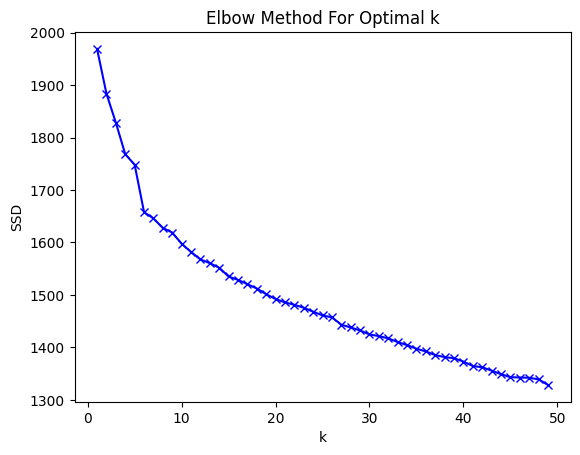

In [18]:
SSD = []
K = range(1,50)
for k in K:
    kmm = KMeans (n_clusters=k, random_state=100)
    kmm = kmm.fit (tfidf_matrix)
    SSD.append(kmm.inertia_)

plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('SSD')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan grafik, elbow berada pada 5 sampai 15

## Silhouette method

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [20]:
K = range(5, 15)  # Silhouette score is not defined for a single cluster, so start from 2
silhouette_avg_score = []
for n_clusters in K:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 100 for reproducibility.
    kmm = KMeans(n_clusters=n_clusters, random_state=100)
    kmm = kmm.fit(tfidf_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(tfidf_matrix, kmm.labels_)

    silhouette_avg_score.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.06949593643440001
For n_clusters = 6 The average silhouette_score is : 0.09783027438388114
For n_clusters = 7 The average silhouette_score is : 0.08556691336995635
For n_clusters = 8 The average silhouette_score is : 0.10442100753749266
For n_clusters = 9 The average silhouette_score is : 0.10470655759985154
For n_clusters = 10 The average silhouette_score is : 0.10962638851258807
For n_clusters = 11 The average silhouette_score is : 0.1096970138021335
For n_clusters = 12 The average silhouette_score is : 0.11237264047714134
For n_clusters = 13 The average silhouette_score is : 0.11351914063037029
For n_clusters = 14 The average silhouette_score is : 0.1101621257233043


In [21]:
nilai_max = max(silhouette_avg_score)
indeks_max = silhouette_avg_score.index(nilai_max)

print("Nilai maksimal silhouette:", nilai_max)
print("Indeks dari nilai maksimal adalah:", indeks_max+5) #karena dimulai dari 2: K = range(2, 20)

Nilai maksimal silhouette: 0.11351914063037029
Indeks dari nilai maksimal adalah: 13


## Hyperparameter optimization

[I 2024-07-29 13:40:01,574] A new study created in memory with name: no-name-aa1f1b7a-0e4a-479c-a9ad-1cc8ae255e6d
[I 2024-07-29 13:40:01,824] Trial 0 finished with value: 0.10962647218694027 and parameters: {'n_clusters': 10, 'init': 'random', 'n_init': 27, 'max_iter': 101}. Best is trial 0 with value: 0.10962647218694027.
[I 2024-07-29 13:40:01,941] Trial 1 finished with value: 0.09789204741880617 and parameters: {'n_clusters': 6, 'init': 'random', 'n_init': 12, 'max_iter': 330}. Best is trial 0 with value: 0.10962647218694027.
[I 2024-07-29 13:40:02,116] Trial 2 finished with value: 0.1101621257233043 and parameters: {'n_clusters': 14, 'init': 'k-means++', 'n_init': 12, 'max_iter': 188}. Best is trial 2 with value: 0.1101621257233043.
[I 2024-07-29 13:40:02,463] Trial 3 finished with value: 0.11057526982038363 and parameters: {'n_clusters': 15, 'init': 'k-means++', 'n_init': 27, 'max_iter': 209}. Best is trial 3 with value: 0.11057526982038363.
[I 2024-07-29 13:40:02,646] Trial 4 fin

Best parameters: {'n_clusters': 13, 'init': 'k-means++', 'n_init': 23, 'max_iter': 428}
Best silhouette score: 0.11431300762660972


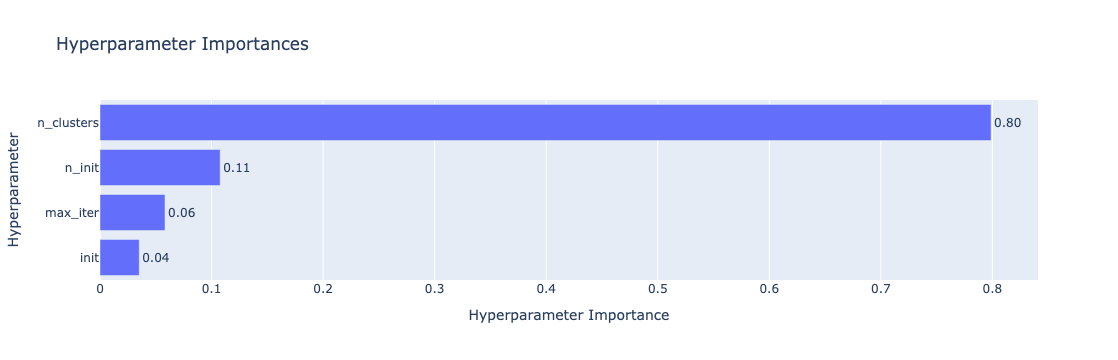

In [22]:
import optuna
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming tfidf_matrix is your data matrix
def objective(trial):
    # Fixed number of clusters based on previous silhouette method
    n_clusters = trial.suggest_int('n_clusters', 5, 15)
    init_method = trial.suggest_categorical('init', ['k-means++', 'random'])
    n_init = trial.suggest_int('n_init', 10, 30)
    max_iter = trial.suggest_int('max_iter', 100, 500)
    random_state = 100

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init, max_iter=max_iter, random_state=random_state)
    kmeans.fit(tfidf_matrix)
    
    # Calculate the silhouette score
    score = silhouette_score(tfidf_matrix, kmeans.labels_)
    
    # Since we want to maximize the silhouette score, return it as is
    return score

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=100))
study.optimize(objective, n_trials=200)

# Get the best parameters
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

# Optional: Visualize the optimization history
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

# KMeans

In [23]:
from sklearn.cluster import KMeans

num_clusters = 13

#km = KMeans(n_clusters=num_clusters, random_state=90)

#km = KMeans(n_clusters=num_clusters, random_state=90, init='random', n_init=23, max_iter=309)

#km = KMeans(n_clusters=13, init='random', n_init=12, max_iter=241, random_state=100)
#random_state=...) agar tidak berubah-ubah
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=23, max_iter=428, random_state=100)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [24]:
output = { 'subject': list(data_subj.values),'subject_p': list(data.values), 'cluster': clusters }

data_hsl = pd.DataFrame(output, index = [clusters] , columns = ['subject','subject_p','cluster'])
data_hsl

subject  \
3   [Closing Engine] Kota Denpasar 2024 - Jalur Zo...   
4   [Kendala] Siswa Masih Bisa Langsung Pengajuan ...   
3   [Closing Engine] Prov NTT 2024 - SMA All Jalur...   
2   [DEV] Pengecekan dan Penyesuaian hasil seleksi...   
4   Pengecekan File Ajuan Pendaftaran di Operator ...   
..                                                ...   
4   Reset daftar Ajuan Pendaftaran Gabungan zona Demo   
3                   Override Engine Seleksi Kota Batu   
6      Dokumen SPH PPDB Online Kota Palangkaraya 2023   
2   Override Info Dari Formatter Kapasitas Jika Ya...   
2                Konfirmasi daerah 3 Kota/Kab di TR I   

                                            subject_p  cluster  
3        closing engine jalur zonasi kategori tahap 1        3  
4   kendala siswa langsung pengajuan pendaftaran 2...        4  
3                closing engine sma all jalur tahap 1        3  
2   dev pengecekan penyesuaian hasil seleksi jalur...        2  
4   pengecekan file ajuan pendaftaran operator ter...        4  
..                                                ...      ...  
4   reset daftar ajuan pendaftaran gabungan zona demo        4  
3                             override engine seleksi        3  
6                                  dokumen sph online        6  
2           override info formatter kapasitas diakses        2  
2                                   konfirmasi 3 tr i        2  

[2036 rows x 3 columns]

In [25]:
data_hsl['cluster'].value_counts() #number of article per cluster (clusters from 0 to 4)

cluster
2     644
7     236
12    156
4     145
10    135
0     129
6     121
3     119
1     116
9     107
5      70
8      31
11     27
Name: count, dtype: int64

In [26]:
from __future__ import print_function

print("Anggota per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print(f"Cluster {i} subject:", end='')
    if i in data_hsl.index:
        for title in data_hsl.loc[i]['subject_p'].values.tolist():
            print(f" {title},", end='')
    print()  # Add whitespace
    print()  # Add whitespace
    
print()
print()

Anggota per cluster:

Cluster 0 subject: up situs publik, infra up situs publik, up situs publik, up situs publik, infra up situs publik, infra up situs publik, up situs publik, up situs publik, st up situs publik real, st up situs publik, st up situs publik real, st up situs publik real, st up situs publik real, st up situs publik, st up situs publik kutai timur, up situs publik, up situs publik kutai timur, up situs publik, up situs publik, up situs publik, up situs publik, up situs publik, up situs publik, up situs publik, banner situs publik online, infrastruktur up situs publik, aplikasi up situs publik, infrastruktur up situs publik, up situs publik, up situs publik, up situs publik, up situs publik, up situs publik madrasah dki, up situs publik dinas dki, situs publik ubah foto header situs publik, situs publik kendala akses situs demo, up situs publik real, kabgrobogan up situs publik real, up situs publik real, up situs publik real jateng, kabdemak up situs publik real, kabpat

# Data tiap Cluster

In [27]:
data_cluster = []

for i in range(13):
    data_cluster.append(data_hsl[data_hsl['cluster'] == i]['subject_p'])
    

In [28]:
data_cluster[10]

10    dev tanggal kartu keluarga berubah 6 september...
10                        siswa disetujui ajuan akunnya
10          req penyesuaian fitur verifikasi akun siswa
10                     normalisasi data ajuan siswa dnt
10                    dev siswa disetujui ajuan akunnya
                            ...                        
10    devmunculkan tombol verifikasi tolak batal ver...
10             backend validasi sidanira pengajuan akun
10        frontend nik validasi sidanira pengajuan akun
10                                 dev gagal ajuan akun
10    dev hapus override disable pilihan ajuan akun ...
Name: subject_p, Length: 135, dtype: object

# IndoBERT

In [111]:
from bertopic import BERTopic
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer


import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

pd.set_option('display.max_rows', None)

1. CountVectorizer:
Ini adalah kelas dari scikit-learn yang digunakan untuk mengubah teks menjadi representasi angka (vector). CountVectorizer menghitung frekuensi kata atau n-gram dalam dokumen teks.

2. ngram_range=(2, 2):
Parameter ngram_range menentukan rentang n-gram yang akan diekstraksi dari teks. Dalam kasus ini, (2, 2) berarti model hanya akan mengekstrak bigram (sepasang kata berturut-turut) dari teks. Sebagai contoh, dari teks "saya suka membaca buku", bigram yang dihasilkan adalah "saya suka", "suka membaca", dan "membaca buku".

3. stop_words=stopword_ind:
Parameter stop_words digunakan untuk menentukan daftar kata-kata yang akan diabaikan (dihapus) dari teks sebelum proses n-gram dilakukan. stopword_ind di sini adalah variabel yang menyimpan daftar kata-kata umum dalam bahasa Indonesia (seperti "dan", "di", "yang", dll.) yang tidak dianggap penting untuk analisis.

1. BERTopic:

BERTopic adalah library yang digunakan untuk pemodelan topik berbasis embedding teks. Model ini menggabungkan transformer berbasis BERT dengan algoritma clustering untuk menemukan dan memvisualisasikan topik dalam teks.

2. top_n_words=10:

Parameter ini menentukan jumlah kata teratas yang akan diambil untuk setiap topik. Dalam hal ini, 10 kata teratas akan diambil untuk menggambarkan setiap topik.

3. n_gram_range=(2, 2):

Parameter ini menentukan rentang n-gram yang akan digunakan dalam pemrosesan teks. (2, 2) berarti model akan menggunakan bigram (sepasang kata berturut-turut).

4. nr_topics=7:

Parameter ini menentukan jumlah topik yang akan diekstraksi dari teks. Dalam kasus ini, model akan mencoba menemukan 7 topik.

5. vectorizer_model=vectorizer_model:

Parameter ini memungkinkan kita untuk menentukan model vectorizer yang telah kita buat sebelumnya. Dalam hal ini, vectorizer_model adalah objek CountVectorizer yang dikonfigurasi untuk menghasilkan bigram dan mengabaikan stop words dalam bahasa Indonesia.

6. umap_model=UMAP(random_state=1):

UMAP (Uniform Manifold Approximation and Projection) adalah algoritma untuk reduksi dimensi yang sering digunakan untuk visualisasi data tinggi dimensi. random_state=1 memastikan bahwa hasil reduksi dimensi bisa direproduksi (konsisten setiap kali dijalankan).

## Cluster 0

In [72]:
# create a list of speeches
docs = data_cluster[0].tolist()

#vectorizer_model = CountVectorizer(ngram_range=(3, 3),
                                   #stop_words=stopword_ind)

vectorizer_model = TfidfVectorizer(ngram_range=(3, 3), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(3,3),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [73]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0    up situs publik  0.237045
1    publik up situs  0.214866
2    situs publik up  0.214866
3  situs publik real  0.156199
4        st up situs  0.132034

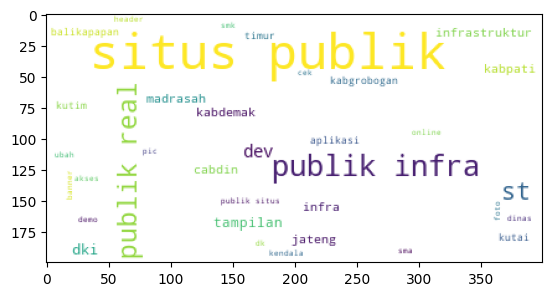

In [32]:
s_str = ', '.join(data_cluster[0])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [116]:
cluster0 = data_hsl.loc[data_hsl["cluster"] == 0]
cluster0 = cluster0.reset_index(drop=True)
cluster0

subject  \
0                   [Up Situs Publik] Kota Serang 2024   
1           INFRA - [Up Situs Publik] Kota Serang 2024   
2                    [Up Situs Publik] Kab. Berau 2024   
3                   [Up Situs Publik] Kota Serang 2024   
4         INFRA - [Up situs Publik] Kota Bengkulu 2024   
5            [Infra] - Up situs Publik Kab. Bungo 2024   
6                 [Up situs Publik] Kota Bengkulu 2024   
7                    [Up situs Publik] Kab. Bungo 2024   
8            ST - Up Situs Publik Riil Kab Bantul 2024   
9              ST - [Up situs Publik] Kab. Bangka 2024   
10        ST - [Kab. Jepara] Up Situs Publik Riil 2024   
11         ST - [Kab. Kudus] Up Situs Publik Riil 2024   
12          ST - Up Situs Publik Riil Kab. Sleman 2024   
13   ST - [Up Situs Publik] Prov. Kalimantan Tengah...   
14        ST - [Up Situs Publik] Kab. Kutai Timur 2024   
15                [Up Situs Publik] Kota Sukabumi 2024   
16             [Up Situs Publik] Kab. Kutai Timur 2024   
17      [Up Situs Publik] Prov. Kalimantan Tengah 2024   
18        [Up Situs Publik] Kabupaten Purbalingga 2024   
19               [Up Situs Publik] Kota Pontianak 2024   
20                                     Up situs Publik   
21                                     Up situs Publik   
22                  [Up situs Publik] Prov. Jambi 2024   
23         [Up Situs Publik] PPDB Provinsi Banten 2024   
24   Banner Situs Publik PPDB Online Prov. Banten 2024   
25     [Infrastruktur] Up Situs Publik Kab Malang 2024   
26          [Aplikasi] Up Situs Publik Kab Malang 2024   
27      [Infrastruktur] Up Situs Publik Kota Batu 2024   
28               [Up Situs Publik] Kab. Barito Selatan   
29            [Up Situs Publik] Kota Palangkaraya 2024   
30             [Up Situs Publik] Kota Banjarmasin 2024   
31              [Up Situs Publik] Kota Banjarbaru 2024   
32         [Up Situs Publik] Madrasah DKI Jakarta 2024   
33            [Up Situs Publik] Dinas DKI Jakarta 2024   
34   [Situs Publik] Ubah Foto pada Header Situs Publik   
35             [Situs Publik] Kendala Akses Situs Demo   
36         [Kota Yogyakarta] Up Situs Publik Riil 2024   
37            [Kab.Grobogan] Up Situs Publik Riil 2024   
38        [Kab. Kulon Progo] Up Situs Publik Riil 2024   
39               Up Situs Publik Riil Prov Jateng 2024   
40               [Kab.Demak] Up Situs Publik Riil 2024   
41            [Kab.Pati] Cek Up Situs Publik Riil 2024   
42                  [Up Situs Publik] Kab. Bantul 2024   
43                   [Up Situs Publik] Kab. Kudus 2024   
44                  [Up Situs Publik] Kab. Jepara 2024   
45                  [Up Situs Publik] Kab. Sleman 2024   
46                  [Up Situs Publik] Kab. Bangka 2024   
47              ST - [Up Situs Publik] Kab. Berau 2024   
48   ST - [Kota Balikapapan] Up Situs Publik Riil 2024   
49      ST -  [Kab.Grobogan] Up Situs Publik Riil 2024   
50       [infra] - Up Situs Publik Kota Pontianak 2024   
51                   [Up Situs Publik] Kab. Berau 2024   
52             [Up Situs Publik] Kota Balikapapan 2024   
53               [Up Situs Publik] Kota Pontianak 2024   
54                [Up Situs Publik] Kab. Grobogan 2024   
55           [Infra] - Up Situs Publik Prov. Bali 2024   
56        [Infra] - Up Situs Publik Prov. Lampung 2024   
57   [Infra] - Up Situs Publik PPDB Provinsi Banten...   
58                [Up Situs Publik] Prov. Lampung 2024   
59         [Up Situs Publik] PPDB Provinsi Banten 2024   
60   [Infra] - Up Situs Publik Prov. Kalimantan Sel...   
61                   [Up Situs Publik] Prov. Bali 2024   
62     [Up Situs Publik] Prov. Kalimantan Selatan 2024   
63   [Infra] - Up Situs Publik Prov. Nusa Tenggara ...   
64        [Infra] - Up Situs Publik Kota Sukabumi 2024   
65    [Up Situs Publik] Prov. Nusa Tenggara Timur 2024   
66             [Up Situs Publik] Kabupaten Batang 2024   
67                [Up Situs Publik] Kota Sukabumi 2024   
68           [Up Situs Publik] Prov DI Yogyak

In [125]:
#row number 24, 34 dan 35 kurang sesuai

# Define the indices of the rows you want to move
index = [24, 34, 35]

# Extract the rows with the specified indices
cluster0_moved = cluster0.loc[index]

# Remove the specified rows from the original DataFrame
cluster0_updated = cluster0.drop(index=index)


print("New DataFrame with moved rows:")
cluster0_moved

New DataFrame with moved rows:


subject  \
24  Banner Situs Publik PPDB Online Prov. Banten 2024   
34  [Situs Publik] Ubah Foto pada Header Situs Publik   
35            [Situs Publik] Kendala Akses Situs Demo   

                                     subject_p  cluster  
24                  banner situs publik online        0  
34  situs publik ubah foto header situs publik        0  
35       situs publik kendala akses situs demo        0

In [121]:
print("Updated cluster0 DataFrame:")
cluster0_updated

Updated cluster0 DataFrame:


subject  \
0                   [Up Situs Publik] Kota Serang 2024   
1           INFRA - [Up Situs Publik] Kota Serang 2024   
2                    [Up Situs Publik] Kab. Berau 2024   
3                   [Up Situs Publik] Kota Serang 2024   
4         INFRA - [Up situs Publik] Kota Bengkulu 2024   
5            [Infra] - Up situs Publik Kab. Bungo 2024   
6                 [Up situs Publik] Kota Bengkulu 2024   
7                    [Up situs Publik] Kab. Bungo 2024   
8            ST - Up Situs Publik Riil Kab Bantul 2024   
9              ST - [Up situs Publik] Kab. Bangka 2024   
10        ST - [Kab. Jepara] Up Situs Publik Riil 2024   
11         ST - [Kab. Kudus] Up Situs Publik Riil 2024   
12          ST - Up Situs Publik Riil Kab. Sleman 2024   
13   ST - [Up Situs Publik] Prov. Kalimantan Tengah...   
14        ST - [Up Situs Publik] Kab. Kutai Timur 2024   
15                [Up Situs Publik] Kota Sukabumi 2024   
16             [Up Situs Publik] Kab. Kutai Timur 2024   
17      [Up Situs Publik] Prov. Kalimantan Tengah 2024   
18        [Up Situs Publik] Kabupaten Purbalingga 2024   
19               [Up Situs Publik] Kota Pontianak 2024   
20                                     Up situs Publik   
21                                     Up situs Publik   
22                  [Up situs Publik] Prov. Jambi 2024   
23         [Up Situs Publik] PPDB Provinsi Banten 2024   
25     [Infrastruktur] Up Situs Publik Kab Malang 2024   
26          [Aplikasi] Up Situs Publik Kab Malang 2024   
27      [Infrastruktur] Up Situs Publik Kota Batu 2024   
28               [Up Situs Publik] Kab. Barito Selatan   
29            [Up Situs Publik] Kota Palangkaraya 2024   
30             [Up Situs Publik] Kota Banjarmasin 2024   
31              [Up Situs Publik] Kota Banjarbaru 2024   
32         [Up Situs Publik] Madrasah DKI Jakarta 2024   
33            [Up Situs Publik] Dinas DKI Jakarta 2024   
36         [Kota Yogyakarta] Up Situs Publik Riil 2024   
37            [Kab.Grobogan] Up Situs Publik Riil 2024   
38        [Kab. Kulon Progo] Up Situs Publik Riil 2024   
39               Up Situs Publik Riil Prov Jateng 2024   
40               [Kab.Demak] Up Situs Publik Riil 2024   
41            [Kab.Pati] Cek Up Situs Publik Riil 2024   
42                  [Up Situs Publik] Kab. Bantul 2024   
43                   [Up Situs Publik] Kab. Kudus 2024   
44                  [Up Situs Publik] Kab. Jepara 2024   
45                  [Up Situs Publik] Kab. Sleman 2024   
46                  [Up Situs Publik] Kab. Bangka 2024   
47              ST - [Up Situs Publik] Kab. Berau 2024   
48   ST - [Kota Balikapapan] Up Situs Publik Riil 2024   
49      ST -  [Kab.Grobogan] Up Situs Publik Riil 2024   
50       [infra] - Up Situs Publik Kota Pontianak 2024   
51                   [Up Situs Publik] Kab. Berau 2024   
52             [Up Situs Publik] Kota Balikapapan 2024   
53               [Up Situs Publik] Kota Pontianak 2024   
54                [Up Situs Publik] Kab. Grobogan 2024   
55           [Infra] - Up Situs Publik Prov. Bali 2024   
56        [Infra] - Up Situs Publik Prov. Lampung 2024   
57   [Infra] - Up Situs Publik PPDB Provinsi Banten...   
58                [Up Situs Publik] Prov. Lampung 2024   
59         [Up Situs Publik] PPDB Provinsi Banten 2024   
60   [Infra] - Up Situs Publik Prov. Kalimantan Sel...   
61                   [Up Situs Publik] Prov. Bali 2024   
62     [Up Situs Publik] Prov. Kalimantan Selatan 2024   
63   [Infra] - Up Situs Publik Prov. Nusa Tenggara ...   
64        [Infra] - Up Situs Publik Kota Sukabumi 2024   
65    [Up Situs Publik] Prov. Nusa Tenggara Timur 2024   
66             [Up Situs Publik] Kabupaten Batang 2024   
67                [Up Situs Publik] Kota Sukabumi 2024   
68           [Up Situs Publik] Prov DI Yogyakarta 2024   
69        [Infra] - Up Situs Publik Kota Denpasar 2024   
70     [Infra] - Up Situs Publik Kabupaten Batang 2024   
71   ST - [Kab. Kulon Progo] Up Situs Publik 

## Cluster 1

In [74]:
# create a list of speeches
docs = data_cluster[1].tolist()

#vectorizer_model = CountVectorizer(ngram_range=(3, 3),
                                   #stop_words=stopword_ind)

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [75]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0           nilai rapor  0.081405
1           isian nilai  0.058701
2           mapel siswa  0.050903
3         siswa lulusan  0.050903
4  lulusan mtspesantren  0.050903

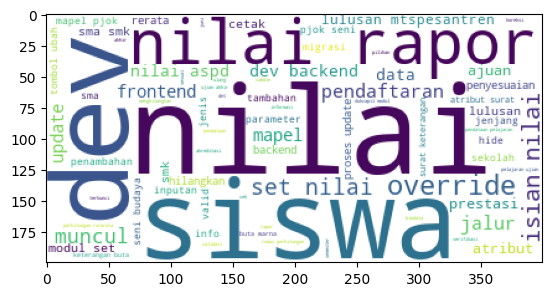

In [35]:
s_str = ', '.join(data_cluster[1])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [124]:
cluster1 = data_hsl.loc[data_hsl["cluster"] == 1].reset_index(drop=True)
cluster1

subject  \
0                    menambah informasi nilai prestasi   
1         [Kab Sleman] Data Nilai Prestasi Sleman 2024   
2    [DEV] Nilai Siswa Berbeda antara Daftar Ajuan,...   
3    [DEV] Nilai Rata2 Semester Siswa Pendataan di ...   
4    Perbaikan Nilai Akhir Siswa yang Terdampak Tik...   
5    [DEV] Perbaikan Nilai Akhir Siswa yang Terdamp...   
6    [DEV] Koreksi Pendaftaran Gabungan Nilai yang ...   
7                        [DEV] Normalisasi Nilai Rapor   
8    [Override] Penambahan Nilai 100 juga Muncul pa...   
9    [DEV] Penambahan Nilai 100 juga Muncul pada Pe...   
10   Override - Penambahan Info Pada Inputan Nilai ...   
11   [DEV] Penambahan Info Pada Inputan Nilai Rapor...   
12   [Override] Nilai Atribut n_lain18=1 Seharusnya...   
13   [Kendala] Koreksi Akreditasi Berdampak pada Ni...   
14   [DEV] Isian Nilai Pendataan Siswa Luar Databas...   
15           [DEV] Editable Nilai Jika Nilainya Kosong   
16   [DEV] Tambah Atribut Pada Cetak Bukti Pemberia...   
17   [override] Isian Nilai Mapel Siswa lulusan MTs...   
18   [override] Isian Nilai Mapel Siswa lulusan MTs...   
19   [override] Isian Nilai Mapel Siswa lulusan MTs...   
20   [Override] Tambahan Nilai 100 pada Pilihan Per...   
21   [Override] Override Nilai Rapor untuk SMA dan ...   
22   [Override] Menghilangkan Isian Nilai Pendataan...   
23   [Override] Nilai Akhir Siswa Jalur Bibit Unggu...   
24           Perubahan Redaksional Jumlah Nilai Rerata   
25   Data Iputan Nilai Rapor Tidak Muncul di Cek Ul...   
26   [Klaten 2024] Siswa DNT tanpa migrasi nilai ti...   
27   [Override] Override Versi 2 Nilai Rapor untuk ...   
28            Update Nilai ASPD Siswa Kota Yogya Karta   
29             Migrasi Data Nilai ASPD Kota Yogyakarta   
30   [Override] Menyembunyikan Nilai di Cetak Penda...   
31               Saat ajuan ulang nilai rapor terkunci   
32   Ganti label "Tanggal Kedatangan Siswa" dimodul...   
33       Set nilai default untuk n_lain20 26 juni 2022   
34   Tambah atribut Keterangan Dukcapil pada modul ...   
35   Set Nilai Siswa muncul notif AF1C1 : Parameter...   
36   Hide tampilan Biodata, Info dan Nilai pada mod...   
37      Update rumus perhitungan rata-rata nilai rapor   
38                                     Hide nilai ASPD   
39   Nilai rapor mapel PJOK dan Seni Budaya berisi ...   
40   Mapel PJOK dan Seni Budaya belum muncul di isi...   
41        Update narasi petunjuk pengisian nilai rapor   
42   Hilangkan informasi Data Nilai Akreditasi Asal...   
43   [DEV] Nilai Atribut n_lain18=1 Seharusnya Bisa...   
44   [DEV] Disable Isian Nilai ASPD di Form Ajuan P...   
45   Proses Update Biodata dan Nilai Lulusan SD 007...   
46   [DEV] Frontend Detail Nilai Rapor di Konfirmas...   
47   Proses Migrasi 19 Juni 2024 - Update Nilai Lul...   
48   [Kab Kulon Progo] Data nilai siswa 2024 - perb...   
49   [DEV] Backend - Inisialisasi Atribut Yang Diko...   
50   [DEV] Frontend - Inisialisasi Atribut Yang Dik...   
51           [DEV] Set Nilai Zonasi Sesuai Tabel Rayon   
52                   Update Nilai MTs Negeri Samarinda   
53                       Update Nilai SMPN 6 Samarinda   
54         [DEV] Saat ajuan ulang nilai rapor terkunci   
55   [Proses][Cabdin Kota Balikpapan] Penyediaan La...   
56             [Kab Kulon Progo] Data nilai siswa 2024   
57             [Kab Kulon Progo] Data nilai siswa 2024   
58   [DEV] Frontend Menambahkan Ketentuan Override ...   
59   [DEV] Backend - Menambahkan Ketentuan Override...   
60   [DEV] Ganti label "Tanggal Kedatangan Siswa" d...   
61   [DNT] Update nilai siswa karena kolomnya ke geser   
62   [DEV] Membatalkan Override Menghilangkan Isian...   
63   [DNT] Proses Update nilai siswa karena kolomny...   
64          [DEV] Modul Set Nilai Nilainya Terdisabled   
65   [DEV] Set nilai default untuk n_lain20 26 juni...   
66   Proses Update Perhitungan nilai Peserta PPDB K...   
67   Tambah atribut Keterangan Dukcapil pada modul ...   
68   [DEV] Tambah atribut Keterangan Dukcapil

## Cluster 2

In [76]:
# create a list of speeches
docs = data_cluster[2].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [77]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0  dev frontend  0.040798
1    data siswa  0.031713
2     siswa dev  0.029303
3  situs publik  0.028908
4    data induk  0.025559

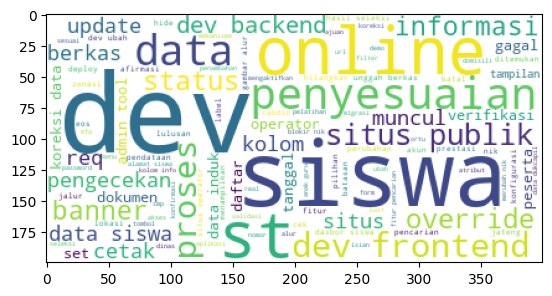

In [78]:
s_str = ', '.join(data_cluster[2])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [126]:
cluster2 = data_hsl.loc[data_hsl["cluster"] == 2].reset_index(drop=True)
cluster2

subject  \
0    [DEV] Pengecekan dan Penyesuaian hasil seleksi...   
1    [Prov DIY]Req menambahkan kolom info NIK pada ...   
2    [DEV] Override - Hide Unggahan Suket Domisili ...   
3      [DEV] Penyesuaian dokumen laporan rekap seleksi   
4             [Prov DIY] Visite PPDB Provinsi DIY 2024   
5    [Prov DIY] Visite PPDB Provinsi DIY 2024 - Dem...   
6    [Prov DIY] Visite PPDB Provinsi DIY 2024 - Dem...   
7                 [DEV] Membatalkan Lapor diri peserta   
8         Data Siswa Tidak Ditemukan Pada Situs Publik   
9    Tidak bisa mendaftar karena Titik Koordinat Hi...   
10   [Kab Bantul] penyesuaian akses pada koreksi da...   
11                   Menyalakan kembali engine seleksi   
12   [DEV] Req menambahkan kolom info NIK pada undu...   
13   [DEV] Tidak bisa mendaftar karena Titik Koordi...   
14                                   ST - koreksi alur   
15   [DEV] Perubahan Label Informasi pada Peringata...   
16   [DEV] Hilangkan Informasi Status Diterima Seme...   
17   [DEV] Data Siswa Tidak Ditemukan Pada Situs Pu...   
18   [DIY 2024] Tambah overide perhitungan N Gabung...   
19         [DIY 2024] Kolom N Gabungan tidak terupdate   
20   [DEV] Hide Kolom Pencarian dan Tombol Live Det...   
21   [DEV] Penyesuaian Tikor Pada Pencarian Agar Sa...   
22   [DEV] Hide informasi tanggal kedatangan siswa ...   
23   [DEV] Penyesuaian link ppdb online pada situs ...   
24        [Kab Kulon Progo]Bantuan unggah master dukuh   
25   Override - Hide Unggahan Sertifikat/Piagam Unt...   
26                [DEV] Pengecekan Peserta Gagal Login   
27   [DEV] Hilangkan Icon Seleksi pada Pencarian Si...   
28   [DEV] Kirim Tanda Ke Frontend Agar Tidak Menam...   
29   [DEV]Koreksi verifikasi akun untuk siswa statu...   
30      [Kab. Barito Selatan] Penambahan Gambar Banner   
31   [Paspor SIAP Online] Kendala Akun SIAP (passwo...   
32   [DEV] [DIY 2024] Tambah overide perhitungan N ...   
33                             Mengganti Gambar Banner   
34   ST - [Req] Pembuatan Poster/banner Pena Berkah...   
35   [DIY 2024] Req update data domisili siswa berd...   
36   [DEV] Jumlah diterima melebihi kapasitas total...   
37                                ST - Alur Prov. Bali   
38       Siswa Bisa mendaftar Walaupun sudah di terima   
39   [DEV] Siswa Bisa mendaftar Walaupun sudah di t...   
40   ST - Pengecekan SSL Custom Domain PPDB Kota Se...   
41   [DEV] Req update data domisili siswa berdasark...   
42                    [DEV] Perubahan Label "Sambutan"   
43   Proses Blokir dan Buka Blokir NIK Bina Lingkun...   
44   [DEV] Tambahkan akses ke admin tool untuk akun...   
45   [DEV] Frontend - Kelompok PIlihan Jalur 0 pada...   
46   [DEV] Backend - Kelompok PIlihan Jalur 0 pada ...   
47   Terdapat Perbedaan Jarak Antara di Situs Publi...   
48       [DEV] Restore Siswa Dengan Tanggal Lahir Null   
49   [DEV] Tanggal Lahir siswa hilang pada menu has...   
50   [DEV] Backend - Tambah atribut alamat dan tiko...   
51   [DEV] Frontend - Tambah atribut alamat dan tik...   
52   [DEV] Tanggal kedatangan siswa di set tidak ad...   
53                     ST - Merekayasa banner bengkulu   
54   Pengecekan jumlah rombel pada situs operator b...   
55          Membuatkan akun BI untuk Dinas DKI Jakarta   
56   Mematikan Ovveride Jadwal Unggah Berkas Jalur ...   
57   Proses Perbaikan Siswa hasil migrasi tidak mun...   
58                            Upgrade spek 10.23.2.245   
59         [Kab Bantul]Req Pembatasan Batal verifikasi   
60   ST - custom domain ppdb.jepara.go.id dari http...   
61    ST - Cek kesesuaian SSL untuk domain PPDB Jepara   
62                       ST - Upgrade spek 10.23.2.245   
63   [Prov DIY] Situs PPDB freeze setelah user sisw...   
64   [DIY 2024] Req Admin Dinas bisa batal verval a...   
65   [Prov DIY] Req  Akses untuk melihat data ajuan...   
66   [Prov DIY] Req Disable kolom status hubungan k...   
67   [DIY 2024] PIC Terima data dari dinas (pelanggan)   
68   [DIY 2024] Verifikasi data pendukung PPD

## Cluster 3

In [80]:
# create a list of speeches
docs = data_cluster[3].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [81]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0     jalur afirmasi  0.078586
1     jalur prestasi  0.076724
2       jalur zonasi  0.073829
3  pendaftaran jalur  0.073513
4       daftar jalur  0.046586

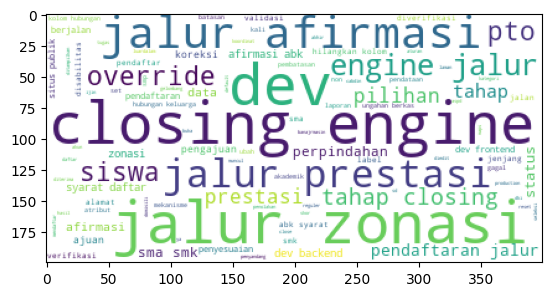

In [82]:
s_str = ', '.join(data_cluster[3])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [127]:
cluster3 = data_hsl.loc[data_hsl["cluster"] == 3].reset_index(drop=True)
cluster3

subject  \
0    [Closing Engine] Kota Denpasar 2024 - Jalur Zo...   
1    [Closing Engine] Prov NTT 2024 - SMA All Jalur...   
2    [DEV] Backend - Tolak Pilihan Provinsi Dan Kot...   
3    [Closing Engine] Kab Purbalingga 2024 - Jalur ...   
4    [DEV] Frontend - Disable Pilihan Provinsi Dan ...   
5    Override - Batasan Ajuan Pendaftaran Jalur Zon...   
6    [Closing Engine] Provinsi Banten 2024 - Jalur ...   
7    [Closing Engine] Prov DI Yogyakarta 2024 - Jal...   
8    [Check] Kondisi Maps Menempel pada Jalur bukan...   
9    [DEV] Data Siswa Beda Alamat Di Jalur Zonasi d...   
10   [Closing Engine] Kota Pontianak 2024 - Jalur A...   
11   [Kendala] Koreksi Pendaftaran pada Jalur Zonas...   
12   [DEV] Koreksi Pendaftaran pada Jalur Zonasi un...   
13   [Closing Engine] Kabupaten Batang 2024 - Jalur...   
14   [Closing Engine] Kota Mataram 2024 - Jalur Afi...   
15            Closing Engine - DKI Jakarta Gelombang 3   
16   Proses pembuatan laporan Daftar peserta diteri...   
17   [Closing Engine] Kota Denpasar 2024 - Jalur Af...   
18            [DEV] Reset engine Sleman jalur afirmasi   
19   [DEV] Siswa PTO saat akan mendaftar jalur PTO ...   
20   [DEV] Hasil Unduhan Laporan Sementara dan Lapo...   
21   [DEV] Munculkan kembali kolom hubungan keluarg...   
22   [DEV]Syarat daftar jenjang SMK jalur afirmasi ...   
23   [Closing Engine] Kab. Kutai Timur 2023 - SD SM...   
24   [DEV] Sembunyikan Jalur SMK Prestasi di Situs ...   
25   [DEV] Syarat Blokir jenjang SMK all jalur tida...   
26   [DEV]Backend - Simpan Alamat yang sebelumnya d...   
27   [Closing Engine] Kota Palangkaraya 2024 - Jalu...   
28   [Closing Engine] Kota Banajrmasin 2024 - Jalur...   
29   [DEV]Frontend - Buka kuncian pilihan alamat pa...   
30   [Kab Bantul] Hilangkan kolom status afirmasi, ...   
31   [DEV] Pembatasan Batal Verifikasi Pendaftaran ...   
32   [Override] Menampilkan Sebagian Berkas pada Ti...   
33   [Kab Bantul] Hilangkan kolom hubungan keluarga...   
34   [Closing Engine] Kabupaten Batang 2024 - Jalur...   
35            Closing Engine - DKI Jakarta Gelombang 2   
36   [Closing Engine] Kota Denpasar 2024 - Jalur Pr...   
37   penyesuaian aturan pendaftaran siswa jalur Tah...   
38   [Override] Pembatasan pengajuan pendaftaran di...   
39       gagal reset engine jalur Prestasi Hafiz Quran   
40   Override - Pilihan Status Afirmasi atau ABK Sy...   
41   Override - Ungahan Berkas Siswa Afirmasi atau ...   
42   Override - Memunculkan Radio Button Pilihan Lu...   
43   [Batang 2024] Penyesuaian kolom input data pre...   
44   [Batang 2024] Validasi data pendaftaran siswa ...   
45   [Batang 2024] Req Override edit status DTKS da...   
46   [Data Pendaftar] Data Pendaftar Siswa Jalur Pr...   
47   Override Tahun Lalu Belum Jalan untuk Mekanism...   
48         Gagal Ijin Koreksi Pendaftaran Jalur Zonasi   
49   Penolakan untuk Ajuan SMA SMK Jalur Afirmasi y...   
50   [Closing Engine] Kabupaten Klaten 2024 - All J...   
51   [Closing Engine] Kota Pasuruan 2024 - Jalur Zo...   
52   [Closing Engine] Kota Batu 2024 - Jalur Zonasi...   
53   [Closing Engine] Kota Pasuruan 2024 - Jalur Af...   
54   [Closing Engine] Kota Mojokerto 2024 - Jalur a...   
55   [Closing Engine] Kota Batu 2024 - Jalur Perpin...   
56   [Closing Engine] Kab Malang 2024 - Jalur Zonas...   
57   [Override] Pembatasan pada Jalur Zonasi untuk ...   
58   [Override] Ubah Ketentuan Override di Jalur Af...   
59   [Closing Engine] Kota Batu 2024 - Jalur Afirma...   
60   [Closing Engine] Kab Malang 2024 - Jalur Afirm...   
61   [Situs Operator] Ubah Urutan Keikutsertaan Pro...   
62           Perubahan Nama Jalur PTO pada Jenjang SMK   
63   [Closing Engine] Kab. Barito Selatan 2024 - Ja...   
64   [Closing Engine] Kota Banajrmasin 2024 - Jalur...   
65   [Closing Engine] Kota Banjarbaru 2024 - Jalur ...   
66   [Closing Engine] Kota Banjarbaru 2024 - Jalur ...   
67   [Override] Pilihan Domisili Luar/Dalam Tidak D...   
68           Syarat daftar jalur zonasi tidak

## Cluster 4

In [86]:
# create a list of speeches
docs = data_cluster[4].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [87]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0      ajuan pendaftaran  0.090840
1      pendaftaran siswa  0.069341
2  pengajuan pendaftaran  0.066718
3              zona demo  0.058492
4        pendaftaran dev  0.058492

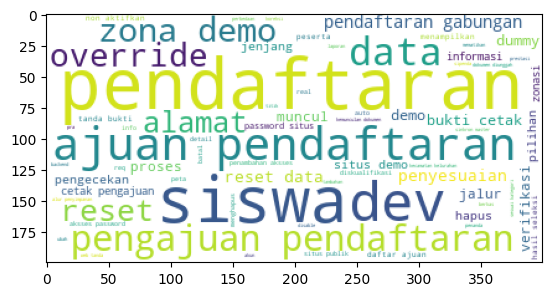

In [88]:
s_str = ', '.join(data_cluster[4])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [128]:
cluster4 = data_hsl.loc[data_hsl["cluster"] == 4].reset_index(drop=True)
cluster4

subject  \
0    [Kendala] Siswa Masih Bisa Langsung Pengajuan ...   
1    Pengecekan File Ajuan Pendaftaran di Operator ...   
2    [DEV] Penyesuaian Redaksi Waktu Akses Pendaftaran   
3    [DEV] Menampilkan Alamat Ajuan pada Detail Sis...   
4    [DEV] Siswa Masih Bisa Langsung Pengajuan Pend...   
5    [DEV] Menampilkan Alamat Ajuan pada Laporan Pe...   
6    [Kab Purbalingga 2024] Siswa tidak bisa lanjut...   
7    [Kendala] Informasi Alamat Tidak Sama antara D...   
8    [Test Case] Data Siswa Pendaftaran di Zonasi d...   
9     [Normalisasi] Normalisasi Data Ajuan Pendaftaran   
10   [DEV] Informasi Alamat Tidak Sama antara Detai...   
11         Penambahan aksses Password untuk Situs Demo   
12   [DEV] Menampilkan Data Siswa di Pendaftaran Ke...   
13   [DEV] Permintaan Data Siswa Sudah Batal Verifi...   
14   Pengecekan peserta pada daftar ajuan pendaftar...   
15   [DEV] Pengecekan peserta pada daftar ajuan pen...   
16    [DEV] Redaksi Jadwal Pendaftaran di Situs Publik   
17   [DIY 2024] Req penyesuaian aturan pendaftaran ...   
18        Menghapus Waktu Pendaftaran pada detil siswa   
19   [DEV] Menghapus Waktu Pendaftaran pada detil s...   
20   [DEV] Set KP Ke Pendaftaran Pertama dan Abaika...   
21   [DEV] Koreksi Pendaftaran Gagal Cetak Bukti Ko...   
22             Menghapus Riwayat Pendaftaran seblumnya   
23   [Fix] Fitur Batal verifikasi ajuan pendaftaran...   
24   [DIP] Req penyesuaian aturan pendaftaran siswa...   
25               Password Situs Demo PPDB Prov. Banten   
26   Pilihan Afirmasi Tidak Muncul di Tanda Bukti P...   
27   Filter Menurut Jam Ajuan Pendaftaran pada Lapo...   
28   [DEV] Filter Menurut Jam Ajuan Pendaftaran pad...   
29       [DEV] Menghapus Riwayat Pendaftaran seblumnya   
30                             Reset pendaftaran siswa   
31   [DEV] Siswa lulusan luar Bantul tetapi domisil...   
32   Mematikan Override Batasan Pendaftaran Kedua S...   
33   Pengembangan BI Pengajuan akun dan Pendaftaran...   
34   [DEV] Backend Pilihan Afirmasi Tidak Muncul di...   
35   Proses Sinkron Master Kelurahan dari Demo Ke Riil   
36   NISN 0094103525 dan 0092591939 Tidak Dapat Tam...   
37   [Override] Update Siswa yang Dikunci Titik Koo...   
38   [Override] Menampilkan Penanda Berkas Sipenda ...   
39   [DEV] Update Siswa yang Dikunci Titik Koordina...   
40   [DEV] Penanda Berkas Sipenda pada Laman Verifi...   
41   [Override] Penyesuaian Label Pilihan Jenis Lul...   
42   [Override] Siswa dengan Atribut (siswa_nilai.n...   
43   [DIY 2024] Step cek data pendaftaran siswa tid...   
44   [DEV] Step cek data pendaftaran siswa tidak mu...   
45   [Kab Purbalingga 2024] Req override ubah tikor...   
46   [DEV]Tampilan Maps pada halaman konfirmasi pen...   
47   Migrasi Penanda Jalur PPDB dari Pra Pendaftara...   
48   [Kab Bantul]Penyesuaian redaksional pada cetak...   
49   pengecekan info pengajuan pendaftaran berbeda ...   
50   Pengecekan Perbedaan Alamat Siswa di Web Denga...   
51   Siswa Sudah Melakukan Pendaftaran Namun Datany...   
52   [BUG] Nopes Dan Token Berbeda Dihalaman Verifi...   
53   Reset daftar Ajuan Pendaftaran Gabungan zona Demo   
54   Reset daftar Ajuan Pendaftaran Gabungan zona Demo   
55                Hapus Data Ajuan Pendaftaran di Demo   
56   [Kab Batang 2024] Siswa luar daerah tidak bisa...   
57   Munculkan semua jalur pendaftaran pada situs p...   
58              Password untuk Akses Situs Publik Demo   
59   Hapus Semua Pendaftaran Siswa semua jenjang di...   
60                 [Kab. Barito Selatan] Data DNT Demo   
61   Hapus Semua Pendaftaran Siswa semua jenjang di...   
62   Merubah Status Peserta dari Diskualifikasi Pen...   
63   Mematikan Ovveride auto approve siswa pra pend...   
64   Reset pendaftaran dan hasil seleksi siswa dumm...   
65                 Password Situs Demo PPDB Kab Batang   
66   [Kab Batang 2024] Reset data siswa demo PPDB K...   
67   [Override] Menghilangkan Informasi Waktu Penga...   
68         Penambahan aksses Password untuk S

## Cluster 5

In [89]:
# create a list of speeches
docs = data_cluster[5].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [90]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0    proses migrasi  0.153952
1    batch database  0.146371
2      migrasi data  0.121966
3  database migrasi  0.121397
4   database proses  0.112925

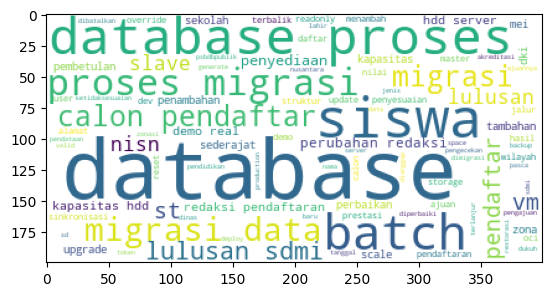

In [91]:
s_str = ', '.join(data_cluster[5])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [129]:
cluster5 = data_hsl.loc[data_hsl["cluster"] == 5].reset_index(drop=True)
cluster5

subject  \
0   Override - Perubahan Redaksi Pendaftaran Siswa...   
1   [Database] Proses Migrasi Database Tambahan Ba...   
2   [DEV] Perubahan Redaksi Pendaftaran Siswa Data...   
3             Menambah Storage pada VM database slave   
4        ST - Menambah Storage pada VM database slave   
5   [DEV] Perubahan Redaksi Pendaftaran Siswa Data...   
6                Penambahan space database 2024-06-19   
7        [Database] Proses Migrasi Data Siswa Batch 3   
8        [Database] Update Master Dukuh ke Production   
9             [Database] Proses Pengecekan Lulusan SD   
10         [Database] Proses Migrasi Tambahan Batch 2   
11          Upgrade Kapasitas Database Zona Nusantara   
12                 [Database] Proses Tambahan Migrasi   
13  Tambah kapasitas HDD pada server database 2024...   
14  ST - Tambah kapasitas HDD pada server database...   
15  Override - Perubahan Redaksi Pendaftaran Siswa...   
16  [Database] MIgrasi Database Siswa Lulusan SD-M...   
17                  [Database] Perbaikan NISN batch 2   
18  [Database] Migrasi Database Siswa Calon Pendaf...   
19  [Database] Proses Migrasi Database Siswa Lulus...   
20                 Deploy server PPDB 2024 - Database   
21  [Database] Proses Perbaikan Data Nilai Calon P...   
22  Tambah kapasitas HDD pada server database 10.2...   
23  ST - Tambah kapasitas HDD pada server database...   
24  [Database] Migrasi Database Calon Siswa Pendaftar   
25                  [Database] Proses Migrasi Batch 5   
26   Upgrade Kapasitas Database PPDB Jawa Tengah 2024   
27  [Database] Proses Migrasi Jenis Asal Sekolah L...   
28  ST - Upgrade Kapasitas Database PPDB Jawa Teng...   
29  [Database] Proses Migrasi Database Siswa Calon...   
30  [Database] Proses Migrasi Akreditasi Asal Seko...   
31  [Database] Proses Migrasi Nilai Hasil Pendataa...   
32  [Database] Proses Migrasi Data Siswa Pendaftar...   
33                Perbaikan Nama Siswa dalam Database   
34                    Scale UP VM Database Master DKI   
35                [Database] Migrasi Database Batch 5   
36                [Database] Migrasi Database Batch 4   
37      [Database] Proses Migrasi Batch 3 dan Batch 4   
38  [Database] Proses Ketidaksesuaian Migrasi Data...   
39  [Database] Proses NISN Baru dari Hasil Pembetu...   
40  [Database] Proses Pembetulan NISN Sebab Terbal...   
41                         [Database] Update Database   
42   [Database] Proses Pembetulan NISN Sebab Terbalik   
43                 Penyesuaian Database Demo dan Riil   
44          Proses Penyesuaian Database Demo dan Riil   
45               [DIY 2024] Reset database siswa demo   
46  [Database] Proses Migrasi Data Pendaftar Karen...   
47  [Database] Proses Migrasi Database Calon Penda...   
48  [Database] Migrasi Data Siswa Calon Pendaftar ...   
49    Penyediaan User Database Readonly Demo dan Real   
50    [Database] Migrasi Data Calon Pendaftar Batch 2   
51    Penyediaan User Database Readonly Demo dan Real   
52  [Database] Migrasi Data Siswa Calon Pendaftar ...   
53    [Database] Migrasi Data Calon Pendaftar Batch 2   
54  [Database] Migrasi Data Siswa Lulusan dan Gene...   
55  [Database] Migrasi Data Siswa Calon Pendaftar ...   
56  [Database] Migrasi Database Siswa Lulusan SD/M...   
57  Proses MIgrasi Database Siswa Lulusan SD-MI Ka...   
58      [Database] Migrasi Lulusan Kab Malang Batch 2   
59        Proses [DIY 2024] Reset database siswa demo   
60  [Database] Migrasi Database Siswa Lulusan SD/M...   
61       Up Scale Database Zona 1 dan DKI 11 Mei 2024   
62       Up Scale Database Zona 1 dan DKI 11 Mei 2024   
63  [Database] MIgrasi Database Siswa Lulusan SD-M...   
64  [Database] Migrasi Data Siswa yang Awalnya "Ti...   
65  Penyediaan VM OCI untuk Database slave all wil...   
66  Sinkronisasi Struktur Database PPDB Kota, pena...   
67  Sinkronisasi Struktur Database PPDB Kota, pena...   
68  Restorasi Database psbdb_publik dengan backup ...   
69  ST - Penyediaan VM OCI untuk Database slave al...   

## Cluster 6

In [92]:
# create a list of speeches
docs = data_cluster[6].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [93]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0     pengiriman sph  0.168085
1  online pengiriman  0.150294
2           sph awal  0.123315
3        awal online  0.098367
4           sph nego  0.087185

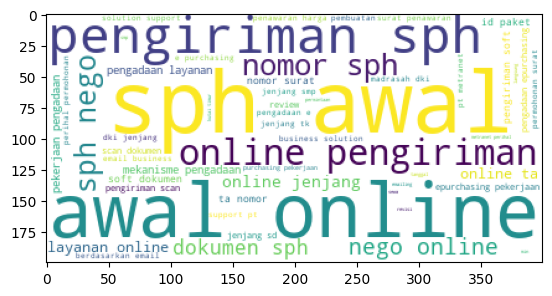

In [94]:
s_str = ', '.join(data_cluster[6])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [130]:
cluster6 = data_hsl.loc[data_hsl["cluster"] == 6].reset_index(drop=True)
cluster6

subject  \
0    Pengiriman SPH Awal PPDB Online Kota Balikpapa...   
1    Review Dokumen SPH Awal PPDB Online Kab Karimu...   
2    Pengiriman SPH Nego PPDB Online Kota Bontang T...   
3    Pengiriman SPH Nego PPDB Online Kota Pontianak...   
4    Pengiriman SPH Nego PPDB Online Kota Pontianak...   
5    Pengiriman SPH Nego PPDB Online Kota Mataram T...   
6    Review Dokumen SPH Awal PPDB Online Kota Bengk...   
7    Emailing SPH Awal PPDB Online Provinsi Kota Se...   
8    Pengiriman SPH Nego PPDB Online Kabupaten Kuta...   
9    Pengiriman SPH Nego PPDB Online Kota Mojokerto...   
10   Pengiriman SPH Nego PPDB Online Kota Mojokerto...   
11   Pengiriman SPH Nego PPDB Online Kota Mojokerto...   
12   Pengiriman SPH Nego PPDB Online Kabupaten Gres...   
13   Pengiriman SPH Nego PPDB Online Kota Denpasar ...   
14   Pengiriman SPH Nego PPDB Online Kota Balikpapa...   
15   Pengiriman SPH Awal PPDB Online Kabupaten Kuta...   
16   Pengiriman SPH Awal PPDB Online Kabupaten Kuta...   
17   Pengiriman SPH Nego PPDB Online Kabupaten Bari...   
18   Pengiriman Soft Dokumen SPH Nego - PPDB Online...   
19   Pengiriman SPH Awal PPDB Online Provinsi Kalim...   
20   Emailing SPH Awal PPDB Online Provinsi Kab. Ba...   
21   Pengiriman Soft Dokumen SPH Nego - PPDB Online...   
22   Pengiriman SPH Awal PPDB Online Kota Mataram T...   
23   Pengiriman Soft Dokumen SPH Awal - PPDB Online...   
24   Pengiriman SPH Awal PPDB Online Provinsi NTT T...   
25   Pengiriman SPH Nego PPDB Online Kota Banjarbar...   
26   Pengiriman SPH Nego PPDB Online Kota Pasuruan ...   
27   Nomor Surat SPH NEGO PPDB Online Kota Yogyakar...   
28   Nomor SPH Awal Berdasarkan email yang disampai...   
29   Dokumen SPH PPDB Online Jawa Tengah Cabang Din...   
30   Pembuatan SPH Awal PPDB Online Kab. Purbalingg...   
31   Pengiriman SPH Nego PPDB Online Kab Malang Tah...   
32   Pengiriman Soft Dokumen SPH Awal - PPDB Online...   
33   Pengiriman SPH Nego PPDB Online Kota Palangka ...   
34   Pengiriman Soft Dokumen SPH Nego - PPDB Online...   
35   Pengiriman SPH Nego PPDB Online Kota Batu Tahu...   
36   Pengiriman Soft Dokumen SPH Nego - PPDB Online...   
37   Nomor Surat SPH Nego PPDB Online Kabupaten Pat...   
38   Pembuatan SPH Awal PPDB Online Provinsi Banten...   
39   Emailing SPH Awal PPDB Online Provinsi Banten ...   
40   Emailing SPH Awal PPDB Online Provinsi Kab. Pu...   
41   Pengiriman SPH Awal PPDB Online Kota Pontianak...   
42   Pengiriman SPH Awal PPDB Online Kota Pontianak...   
43   Pengiriman SPH Awal PPDB Online Kota Denpasar ...   
44   Review SPH Awal PPDB Online Kabupaten Bangka 2024   
45   Pengiriman SPH Awal PPDB Online Cabdin Balikpa...   
46   Pengiriman SPH Awal PPDB Online Provinsi Kalim...   
47   Pengiriman SPH Awal PPDB Online Kabupaten Bari...   
48   Pengiriman Scan Dokumen SPH Awal - PPDB Online...   
49   Pengiriman Scan Dokumen SPH Awal - PPDB Online...   
50   Pengiriman Soft Dokumen SPH Awal - PPDB Online...   
51   Pengiriman Soft Dokumen SPH Awal - PPDB Online...   
52   Pengiriman Soft Dokumen SPH Awal - PPDB Online...   
53   Pengiriman SPH Awal PPDB Online Kabupaten Gres...   
54   Review SPH Awal PPDB Online Kabupaten Karimun ...   
55   Nomor Surat SPH Awal PPDB Online Kabupaten Kul...   
56   Pengiriman SPH Awal PPDB Online Kota Balikpapa...   
57   Pengiriman SPH Awal PPDB Online Kota Palangka ...   
58   Pengiriman Scan Dokumen SPH Awal - PPDB Online...   
59   Pengiriman SPH Awal PPDB Online Kota Bontang T...   
60   Pengiriman SPH Awal PPDB Online Kabupaten Bera...   
61   Pembuatan SPH Awal PPDB Online Provinsi Jambi ...   
62   Review SPH Awal PPDB Online Kabupaten Bantul 2024   
63   Pengiriman Scan Dokumen SPH Awal - PPDB Online...   
64          Nomor SPH Awal PPDB Online Prov Jambi 2024   
65   Review Dokumen SPH Awal PPDB Online Prov Jambi...   
66   Nomor SPH Awal Berdasarkan email yang disampai...   
67     Nomor SPH Awal PPDB Online Kota Banjarbaru 2024   
68   Pengiriman SPH Awal PPDB Online Kota Pas

## Cluster 7

In [51]:
# create a list of speeches
docs = data_cluster[7].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [52]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0     migrasi data  0.170410
1   proses migrasi  0.150474
2       data siswa  0.138725
3  susulan migrasi  0.095222
4    siswa lulusan  0.095222

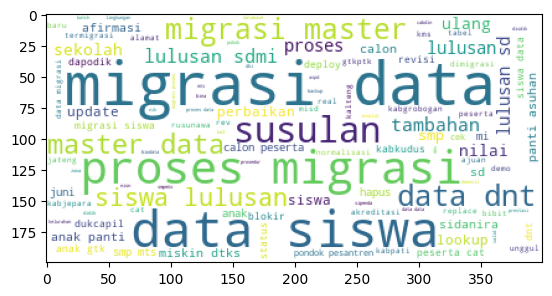

In [53]:
s_str = ', '.join(data_cluster[7])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [131]:
cluster7 = data_hsl.loc[data_hsl["cluster"] == 7].reset_index(drop=True)
cluster7

subject  \
0             Migrasi Data Kelurahan Dari Demo ke Real   
1                  [Kab Sleman] Data siswa Sleman 2024   
2                      Proses Data Migrasi Susulan [4]   
3                             Migrasi Data Susulan [1]   
4                                   Proses deploy data   
5          [Kab Bantul] Data siswa 2024  - perbaikan 1   
6    [Kab. Barito Selatan] Migrasi data Lulusan asa...   
7                            Migrasi Data Master Siswa   
8                     Proses Migrasi Data Master Siswa   
9                     Migrasi peserta CAT susulan ke 2   
10                     Proses Migrasi Data Susulan [3]   
11         Migrasi Data DNT Kab.Kudus 2024 - susulan 2   
12             Proses Migrasi peserta CAT susulan ke 2   
13             Proses Normalisasi data Ajuan Siswa DNT   
14   Proses Migrasi Data Siswa Lulusan SD dan MI Ko...   
15                         Proses migrasi data susulan   
16                     Proses Migrasi Data Susulan [2]   
17                         Migrasi peserta CAT susulan   
18                  Proses Migrasi peserta CAT susulan   
19                     Proses Migrasi Data Susulan [2]   
20   Proses Migrasi Data Siswa Lulusan Kota Sukabum...   
21                       Migrasi data DNT susulan ke 1   
22   Migrasi Data Siswa Lulusan 2024 Provinsi Bante...   
23    Migrasi Data Siswa Lulusan 2024 Provinsi Bant...   
24               Migrasi Data Sidanira 2024 - Update 1   
25   Proses Migrasi Data DNT Kab.Kudus 2024 - susul...   
26                         Proses Migrasi Data Susulan   
27                       Migrasi data DNT susulan ke 1   
28                Proses Migrasi Master Data Siswa [8]   
29              [Prov DIY] Migrasi Data siswa tambahan   
30                         Proses Migrasi Data Susulan   
31                    Proses Migrasi Data Master Siswa   
32   Proses Migrasi dan Replace Alamat Siswa Rusuna...   
33   Proses Normalisasi Data Siswa Luar yang dimigrasi   
34                    Proses Migrasi Data Master Siswa   
35                Proses Migrasi Master Data Siswa [7]   
36   [Kota Balikpapan] Proses Migrasi Data DNT Kota...   
37                                    Migrasi Data CAT   
38                             Proses Migrasi Data CAT   
39   Proses Migrasi Biodata Lulusan untuk PPDB Prov...   
40   Proses Migrasi Tambah data baru dan update dat...   
41                           Migrasi Data Siswa Blokir   
42                       Migrasi Master Data Siswa [6]   
43                       Migrasi Master Data Siswa [5]   
44                Proses Migrasi Master Data Siswa [6]   
45   Proses Migrasi Data Siswa Lulusan 2024 Provins...   
46                 Migrasi Data susulan Nilai Prestasi   
47   Proses Migrasi Data Siswa Lulusan 2024 Provins...   
48   Migrasi Data Siswa Lulusan 2024 Provinsi Bante...   
49                       Migrasi Master Data Siswa [5]   
50                       Migrasi Master Data Siswa [4]   
51                       Migrasi Master Data Siswa [3]   
52                       Migrasi Master Data Siswa [2]   
53                           Migrasi Master Data Siswa   
54                             data susulan siswa ke 4   
55        Migrasi Data DNT Lulusan Kota Pontianak 2024   
56               Migrasi Master Data Siswa susulan [3]   
57               Migrasi Master Data Siswa susulan [4]   
58               Migrasi Master Data Siswa susulan [1]   
59               Migrasi Master Data Siswa susulan [2]   
60                           Migrasi Master Data Siswa   
61                                  Migrasi Data Siswa   
62                                  Migrasi Data Siswa   
63          [Kota Jambi] Migrasi Data Siswa Lulusan MI   
64                     [Kota Jambi] Migrasi Data Siswa   
65                                  Migrasi Data Siswa   
66   Migrasi Data Siswa Lulusan 2024 Provinsi Bante...   
67     Migrasi Data Siswa Lulusan 2024 Provinsi Banten   
68        [Prov DIY 2024] Migrasi Data siswa 

## Cluster 8

In [105]:
# create a list of speeches
docs = data_cluster[8].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(1, 1), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(1,1),
                          nr_topics='auto',
                          min_topic_size=2,
                          calculate_probabilities=True,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [106]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0    17  0.232957
1    16  0.232957
2    19  0.153538
3    18  0.153538
4    15  0.092483

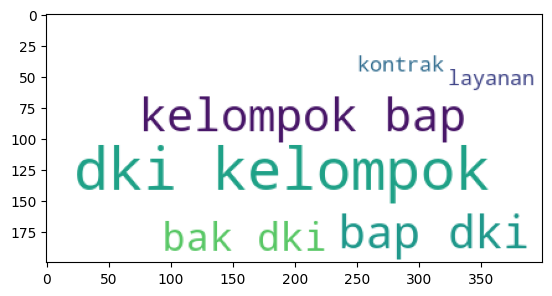

In [56]:
s_str = ', '.join(data_cluster[8])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [132]:
cluster8 = data_hsl.loc[data_hsl["cluster"] == 8].reset_index(drop=True)
cluster8

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


subject                        subject_p  \
0        BAK - PPDB DKI Kelompok 17 - 2023              bak dki kelompok 17   
1        BAP - PPDB DKI Kelompok 17 - 2023              bap dki kelompok 17   
2         BAP - PPDB DKI Kelompok 2 - 2023               bap dki kelompok 2   
3          BAP - PPDB DKI Kelompok 5- 2023               bap dki kelompok 5   
4         BAP - PPDB DKI Kelompok 4 - 2023               bap dki kelompok 4   
5        BAP - PPDB DKI Kelompok 18 - 2023              bap dki kelompok 18   
6        BAP - PPDB DKI Kelompok 19 - 2023              bap dki kelompok 19   
7        BAP - PPDB DKI Kelompok 13 - 2023              bap dki kelompok 13   
8        BAP - PPDB DKI Kelompok 12 - 2023              bap dki kelompok 12   
9        BAK - PPDB DKI Kelompok 12 - 2023              bak dki kelompok 12   
10       BAP - PPDB DKI Kelompok 11 - 2023              bap dki kelompok 11   
11       BAK - PPDB DKI Kelompok 11 - 2023              bak dki kelompok 11   
12        BAP - PPDB DKI Kelompok 6 - 2023               bap dki kelompok 6   
13        BAK - PPDB DKI Kelompok 6 - 2023               bak dki kelompok 6   
14       BAP - PPDB DKI Kelompok 14 - 2023              bap dki kelompok 14   
15       BAK - PPDB DKI Kelompok 14 - 2023              bak dki kelompok 14   
16       BAP - PPDB DKI Kelompok 15 - 2023              bap dki kelompok 15   
17       BAK - PPDB DKI Kelompok 15 - 2023              bak dki kelompok 15   
18       BAK - PPDB DKI Kelompok 10 - 2023              bak dki kelompok 10   
19       BAP - PPDB DKI Kelompok 16 - 2023              bap dki kelompok 16   
20       BAK - PPDB DKI Kelompok 16 - 2023              bak dki kelompok 16   
21        BAP - PPDB DKI Kelompok 8 - 2023               bap dki kelompok 8   
22        BAK - PPDB DKI Kelompok 8 - 2023               bak dki kelompok 8   
23        BAP - PPDB DKI Kelompok 1 - 2023               bap dki kelompok 1   
24        BAK - PPDB DKI Kelompok 1 - 2023               bak dki kelompok 1   
25        BAP - PPDB DKI Kelompok 3 - 2023               bap dki kelompok 3   
26        BAK - PPDB DKI Kelompok 3 - 2023               bak dki kelompok 3   
27        BAP - PPDB DKI Kelompok 7 - 2023               bap dki kelompok 7   
28        BAK - PPDB DKI Kelompok 7 - 2023               bak dki kelompok 7   
29  Kontrak Layanan - PPDB DKI Kelompok 11  kontrak layanan dki kelompok 11   
30        BAP - PPDB DKI Kelompok 9 - 2023               bap dki kelompok 9   

    cluster  
0         8  
1         8  
2         8  
3         8  
4         8  
5         8  
6         8  
7         8  
8         8  
9         8  
10        8  
11        8  
12        8  
13        8  
14        8  
15        8  
16        8  
17        8  
18        8  
19        8  
20        8  
21        8  
22        8  
23        8  
24        8  
25        8  
26        8  
27        8  
28        8  
29        8  
30        8

## Cluster 9

In [57]:
# create a list of speeches
docs = data_cluster[9].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(2, 2), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(2,2),
                          nr_topics=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [59]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0    pilihan sekolah  0.104914
1    batasan pilihan  0.084167
2        sekolah dev  0.076797
3   aturan pemilihan  0.060042
4  pemilihan sekolah  0.060042

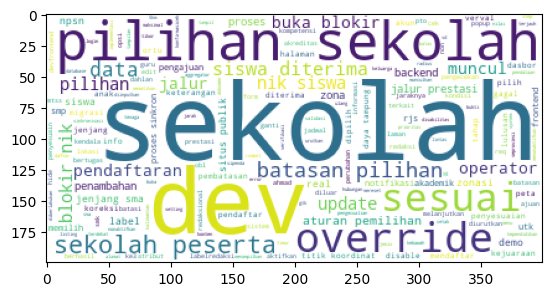

In [60]:
s_str = ', '.join(data_cluster[9])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [133]:
cluster9 = data_hsl.loc[data_hsl["cluster"] == 9].reset_index(drop=True)
cluster9

subject  \
0    Pilihan ke-3 diluar RJS sekolah, berhasil mend...   
1    [Kab Sleman] Pembatasan pilihan sekolah hanya ...   
2    [DEV] Pilihan ke-3 diluar RJS sekolah, berhasi...   
3    [DEV] Ada Pilihan Sekolah Tidak Muncul pada Pe...   
4    [DEV] Buka Blokir NIK siswa yang sudah diterim...   
5    [DEV] Anak guru bisa mendaftar di sekolah buka...   
6    Override - Hide Info Pilihan Diterima Pada Lam...   
7    [DEV] [Override] Penyesuaian Batasan Pilih Sek...   
8    Buka Blokir NIK siswa yang sudah diterima seko...   
9        Proses Migrasi Sekolah Asal untuk Jenjang SMP   
10   [Override] Terkait Akreditas Sekolah Asal Saat...   
11   [DEV] Hide Info Pilihan Diterima Pada Laman Da...   
12   [DEV] Terkait Akreditas Sekolah Asal Saat Peng...   
13   [Kab. Purbalingga 2024] Aktifkan kembali serta...   
14   [Kab. Purbalingga 2024] Req penambahan kondisi...   
15   [DEV] Req penambahan kondisi Aturan Pemilihan ...   
16   [DEV] Backend - Pembatasan pilihan sekolah han...   
17                    Update sekolah peserta zona riil   
18   [DEV] Akun Operator Sekolah Masih Bisa Edit Ni...   
19   Penambahan popup notifikasi jika memilih Sekol...   
20   Gagal melanjutkan proses pendaftaran utk 1 pil...   
21   me non-aktifkan Override batasan pilihan sekol...   
22                  [Override] Batasan pilihan sekolah   
23   [Override] batasan pilihan sekolah utk jalur P...   
24                 Batasan pilihan sekolah jenjang SMA   
25     [Override] Pengecualian batasan pilihan sekolah   
26      Migrasi Data Sekolah Peserta Dari Demo Ke Real   
27   Pengecekan Kompetensi dan Daya Tampung Sekolah...   
28   Override - Perubahan Redaksi Informasi Pilihan...   
29   [Kab. Batang] Label pilihan sekolah 1 dan 2 pa...   
30   [Prov NTT 2024] Cek Data Sekolah dan Jadwal PP...   
31   [Prov Bali 2024] Cek Data Sekolah & Jadwal PPD...   
32   Penambahan label RJS Saat Memilih Sekolah pada...   
33                Titik Koordinat Sekolah tidak update   
34            Disable untuk pilihan Provinsi dan Kota    
35   Pilihan Sekolah Diurutkan Dari Yang Jaraknya P...   
36    Kendala Koreksi Sekolah Peserta di Operator Demo   
37   Buka Blokir NIK siswa yang sudah diterima sekolah   
38        Blokir NIK siswa yang sudah diterima sekolah   
39                 Update Lokasi Sekolah Peserta - SMP   
40   Mematikan Override Verifikasi Dokumen Prestasi...   
41   Peta dan Tikor tidak tampil di menu koreksi se...   
42                        Gagal Login Operator Sekolah   
43   Siswa Pendataan Jalur Prestasi dengan Jenis As...   
44   [Override] Pilihan Sekolah Kedua dan Seterusny...   
45           Asal Sekolah tidak muncul di situs publik   
46   Munculkan Label Prioritas Zonasi Pada Listing ...   
47   Data Kejuaraan belum muncul pada dasbor siswa ...   
48   NPSN Sekolah MTSS AHMAD DAHLAN di sistem tidak...   
49              Override Aturan Pemilihan Sekolah 2024   
50                   Override Aturan Pemilihan Sekolah   
51   Setting siswa anak guru atau tenaga kependidik...   
52             Proses Update sekolah peserta zona riil   
53   [DEV] Backend - Data Kejuaraan belum muncul pa...   
54   [DEV] Backend - Data Kejuaraan belum muncul pa...   
55   Proses Sinkron Sekolah Peserta dari Zona Demo ...   
56   [DEV] Penambahan popup notifikasi jika memilih...   
57   [DEV] Buka Blokir NIK siswa yang sudah diterim...   
58   [DEV] Buka Blokir NIK siswa yang sudah diterim...   
59   [DEV] Menampilkan Halaman Konfirmasi/Cek Ulang...   
60   [DEV] Backend - Aggregator Konten Halaman Data...   
61   [DEV] Frontend - Halaman Data Zonasi Sekolah d...   
62   [DEV] Pengecekan Kompetensi dan Daya Tampung S...   
63   Proses Sinkronisasi Sekolah Peserta Jenjang SD...   
64                      Proses Sinkron sekolah peserta   
65   [DEV] Gagal melanjutkan proses pendaftaran utk...   
66   [DEV] Menonaktifkan Override Batasan Pilihan S...   
67          [DEV] Titik Koordinat Sekolah tidak update   
68   [Batang 2024] Penyesuain label/redaksi p

## Cluster 10

In [61]:
# create a list of speeches
docs = data_cluster[10].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(3, 3), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(3,3),
                          nr_topics='auto',
                          min_topic_size=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [62]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0        data ajuan siswa  0.114757
1      siswa non database  0.114757
2      akun siswa nyantol  0.087489
3    data kejuaraan ajuan  0.087489
4  nyantol data kejuaraan  0.087489

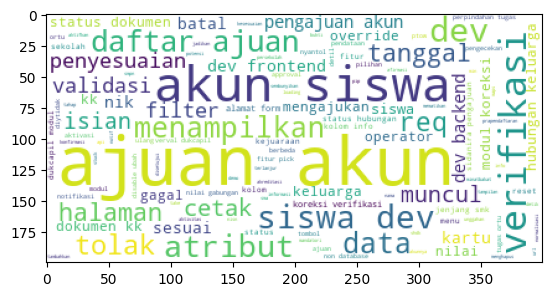

In [63]:
s_str = ', '.join(data_cluster[10])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [134]:
cluster10 = data_hsl.loc[data_hsl["cluster"] == 10].reset_index(drop=True)
cluster10

subject  \
0    [DEV] Tanggal Kartu keluarga berubah menjadi 6...   
1    [DIY 2024] Siswa tidak bisa disetujui ajuan ak...   
2    [DIY 2024] Req penyesuaian fitur verifikasi ak...   
3                     Normalisasi data Ajuan Siswa DNT   
4    [DEV] Siswa tidak bisa disetujui ajuan akunnya...   
5    Pemutakhiran data siswa sesuai atribut mengacu...   
6    [DIY 2024] Penyesuaian fitur verifikasi akun s...   
7    [DEV] Nilai rata rata rapor saat pendaftaran b...   
8    [DEV] Isi Atribut N_LAIN12 Dari API Tapem / Du...   
9    [Prov DIY 2024]Siswa Pendataan tidak bisa ajua...   
10   [Prov DIY] Req Tambah kolom status hubungan ke...   
11   [Prov DIY] Nilai Gabungan pada ajuan akun dan ...   
12             Gagal Approval Ajuan Akun di SMP Zonasi   
13   [DEV] Nilai rata rata rapo berbeda antara di v...   
14   [DEV] Penelusuran Koordinat Siswa Berbeda Anta...   
15   [DEV] Siswa Perpindahan masih nyantol data per...   
16      [Prov DIY]Tidak bisa ajuan akun di jenjang SMK   
17   [DIY 2024] Kolom info Hubungan Keluarga pada c...   
18                     [Prov DIY]Tidak bisa ajuan akun   
19   [Prov DIY 2024] Penyiapan akun demo ajuan akun...   
20   [Kendala] Reset data Ajuan supaya menjadi Ajua...   
21   [Publik] Sudah Diabtasi Waktu Ajuan Akun dan P...   
22    Pengecekan siswa tidak bisa mengajukan akun ke 2   
23           Menghapus Ajuan Akun siswa Prapendaftaran   
24         Mematikan Validasi NIK saat mengajukan akun   
25   Menambahkan NIK pada validasi SIdanira saat pe...   
26   mematikan Override penguncian pilihan provinsi...   
27   menampilkan kembali validasi data sidanira saa...   
28   Tahun Lulus Siswa 2024 Namun Saat Ajuan Akun M...   
29    [Prov DIY]  Atribut tidak muncul saat ajuan akun   
30   [Prov DIY]Hilangkan isian NIK saat ajuan akun ...   
31                       Normalisasi data Ajuan Siswa    
32         Pengecekan siswa tidak bisa mengajukan akun   
33   Ajuan akun siswa yang kedua masih nyantol data...   
34   Rata rata aktivitas approval ajuan akun persek...   
35   Ajuan akun siswa ulang setelah di tolak tetap ...   
36   Operator sekolah gagal verifikasi ajuan akun k...   
37   Sembunyikan informasi Akreditasi sekolah asal ...   
38   Siswa Asal sekolah Luar prov dan jenis lulusan...   
39   Siswa non database setelah di tolak pengajuan ...   
40   Siswa belum ajuan akun tetapi muncul notif "NI...   
41   Status kepesertaan PIP terbaca "tidak PIP" saa...   
42   Take down notifikasi konfirmasi verifikasi aju...   
43   Tambah atribut status dokumen KK saat verifika...   
44   Tambah atribut status dokumen KK pada filter K...   
45   Status siswa anak guru dijenjang SMA/SMK tidak...   
46   Tanggal cetak KK tidak bisa diklik saat ajuan ...   
47   menampilkan atribut tanggal Tanggal perpindaha...   
48   Disable ubah tanggal cetak kartu KK di modul k...   
49   Menampilkan data verval dukcapil di modul deti...   
50   Gagal ajuan akun dan muncul notifikasi Perhati...   
51   Tambahkan atribut SHDK, Kesesuaian nama ortu d...   
52   Loading tampilan halaman ajuan akun lama bisa ...   
53                Ajuan akun siswa stuck di tahap ke 2   
54   Jadikan mandatori isian saat verifikasi ajuan ...   
55        Menampilkan maps pada cetak bukti ajuan akun   
56   Munculkan tombol verifikasi, Tolak, batal veri...   
57   Isian Nilai Saat Verifikasi akun belum muncul ...   
58       Reset status verifikasi akun siswa dummy 2023   
59   [DEV] Reset data Ajuan supaya menjadi Ajuan la...   
60   siswa non database (luilusan 2023) saat ajuan ...   
61     [Prov DIY]Siswa Pendataan tidak bisa ajuan akun   
62   [DEV] Tolak 3 Ajuan SMA Afirmasi yang Terlanju...   
63           [DIY 2024] Fitur Pick Up ajuan akun siswa   
64   [DIY 2024] Tambah mekanisme batal pickup ajuan...   
65   [DEV] Backend Ajuan akun siswa yang kedua masi...   
66   Laporan Rata rata aktivitas approval ajuan aku...   
67   [Prov DIY] Req Akses untuk melihat data ajuan ...   
68   [DEV] Hanya Validasi Ketika Akan Tolak V

## Cluster 11

In [64]:
# create a list of speeches
docs = data_cluster[11].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(3, 3), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(3,3),
                          nr_topics='auto',
                          min_topic_size=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [65]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0            setup bi setup  0.154465
1      setup database slave  0.134523
2  nusantara setup database  0.084849
3     setup database master  0.084849
4               bi setup bi  0.084849

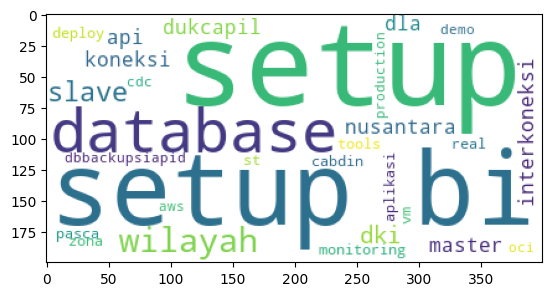

In [66]:
s_str = ', '.join(data_cluster[11])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [135]:
cluster11 = data_hsl.loc[data_hsl["cluster"] == 11].reset_index(drop=True)
cluster11

subject  \
0            setup Interkoneksi ke API Dukcapil   
1              setup aplikasi pasca deploy riil   
2             Setup BI Wilayah Kota Banjarmasin   
3               Setup BI wilayah Kota Mojokerto   
4                   Setup BI wilayah Kab Malang   
5   [DLA] - [Setup BI] Kab. Barito Selatan 2024   
6              Setup BI Wilayah Kota Yogyakarta   
7                 Setup BI Wilayah Kota Bontang   
8            Setup BI Wilayah Cabdin Balikpapan   
9                        Setup BI Kota Pasuruan   
10           Setup VM database Zona Jawa Tengah   
11                   Setup BI Prov. DKI Jakarta   
12      ST - Setup Interkoneksi ke API Dukcapil   
13                          Setup BI Kab. Demak   
14      [DLA] - [Setup BI] Kota Banjarbaru 2024   
15                            Setup BI Kab Pati   
16              Setup Database Master Nusantara   
17               Setup Database Slave Nusantara   
18                    Setup Database Master DKI   
19                     Setup Database Slave DKI   
20                Setup Koneksi Tools PPDB 2024   
21                    Setup Monitoring database   
22                     Setup BI ppdb tahun 2024   
23      Setup Koneksi database dbbackup.siap.id   
24              Setup Database Slave All di AWS   
25              Setup Database Slave All di OCI   
26       Setup CDC Database Production dan Demo   

                                subject_p  cluster  
0         setup interkoneksi api dukcapil       11  
1        setup aplikasi pasca deploy real       11  
2                        setup bi wilayah       11  
3                        setup bi wilayah       11  
4                        setup bi wilayah       11  
5                            dla setup bi       11  
6                        setup bi wilayah       11  
7                        setup bi wilayah       11  
8                 setup bi wilayah cabdin       11  
9                                setup bi       11  
10                 setup vm database zona       11  
11                           setup bi dki       11  
12     st setup interkoneksi api dukcapil       11  
13                               setup bi       11  
14                           dla setup bi       11  
15                               setup bi       11  
16        setup database master nusantara       11  
17         setup database slave nusantara       11  
18              setup database master dki       11  
19               setup database slave dki       11  
20                    setup koneksi tools       11  
21              setup monitoring database       11  
22                               setup bi       11  
23  setup koneksi database dbbackupsiapid       11  
24           setup database slave all aws       11  
25           setup database slave all oci       11  
26     setup cdc database production demo       11

## Cluster 12

In [67]:
# create a list of speeches
docs = data_cluster[12].tolist()

vectorizer_model = TfidfVectorizer(ngram_range=(3, 3), stop_words=stopword_ind)

# generate a bigram topic model with 10 top terms and 8 topics
bertopic_model = BERTopic(top_n_words=5,
                          n_gram_range=(3,3),
                          nr_topics='auto',
                          min_topic_size=2,
                          vectorizer_model=vectorizer_model,
                          umap_model = UMAP(random_state=1))  # setting seed topics reproduce

# fit the model to data
topics, probabilities = bertopic_model.fit_transform(docs)

In [68]:
# topic visualization
topic = pd.DataFrame(bertopic_model.get_topic(0), columns=["Topic", "Prob"])
topics_df = pd.concat([topic], axis=1)
topics_df

Topic      Prob
0  deploy real deploy  0.403236
1    real deploy real  0.361211
2      st deploy real  0.226382
3      real st deploy  0.226382
4      deploy real st  0.166215

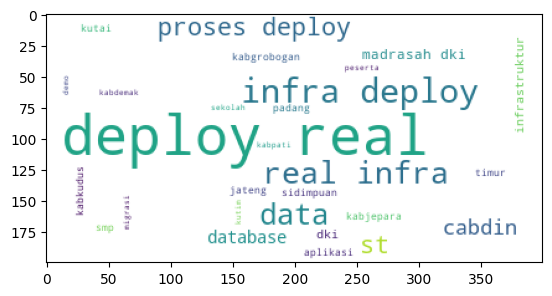

In [69]:
s_str = ', '.join(data_cluster[12])

wc = WordCloud(background_color='white').generate(s_str)
plt.imshow(wc)

In [136]:
cluster12 = data_hsl.loc[data_hsl["cluster"] == 12].reset_index(drop=True)
cluster12

subject  \
0             [Deploy Real] PPDB Provinsi Lampung 2024   
1    [Kab Purbalingga 2024] Deploy Real PPDB Kab Pu...   
2                        [Deploy Riil] Kab. Berau 2024   
3                INFRA - [Deploy Riil] Kab. Bungo 2024   
4             INFRA - [Deploy Riil] Kota Bengkulu 2024   
5                [Deploy Data Riil] Kota Bengkulu 2024   
6                   [Deploy Data Riil] Kab. Bungo 2024   
7                        [Deploy Riil] Kab. Bungo 2024   
8                     [Deploy Riil] Kota Bengkulu 2024   
9           [Infra] - Deploy Riil Kota Balikpapan 2024   
10            Deploy Riil Data Migrasi Kota Balikpapan   
11                  [Deploy Riil] Kota Balikpapan 2024   
12                   [Deploy Real] Kota Pontianak 2024   
13             [Deploy Real] Provinsi DKI Jakarta 2024   
14                   ST - [Kab.Kudus] Deploy Real 2024   
15              ST - [Deploy Real] Kota Pontianak 2024   
16                   ST - Deploy Real Kab. Sleman 2024   
17                ST - [Deploy Real] Kota Mataram 2024   
18       ST - [Kab.Jepara] Deploy Real Kab Jepara 2024   
19   [Infra] - Deploy Riil Prov. Kalimantan Tengah ...   
20              [Infra] - Deploy Riil Kab. Bantul 2024   
21         [Infra] - Deploy Riil Kab. Kutai Timur 2024   
22            [Infra] - Deploy Riil Kota Sukabumi 2024   
23   INFRA - [Kab Purbalingga 2024] Deploy Real PPD...   
24              INFRA - [Deploy Real] Kab. Bangka 2024   
25               INFRA - [Deploy Real] Kota Jambi 2024   
26   ST - [Prov. Kalimantan Selatan] Deploy Real Pr...   
27      [Prov DI Yogyakarta] Deploy Real Prov DIY 2024   
28           [Database] - Deploy Riil Kab. Bantul 2024   
29   [Prov. Kalimantan Tengah] Proses Deploy Data R...   
30   [Deploy Real] Deploy Data PPDB Kota Sukabumi 2024   
31    [Deploy Real] Proses Deploy Data Kota Jambi 2024   
32   [Kab Purbalingga 2024] Proses Deploy Data Real...   
33   [Deploy Real] Proses Deploy Data Kab. Bangka 2024   
34          [Deploy Riil] Prov. Kalimantan Tengah 2024   
35                 [Deploy Riil] Kab. Kutai Timur 2024   
36                      [Deploy Riil] Kab. Bantul 2024   
37                    [Deploy Riil] Kota Sukabumi 2024   
38   [Prov. Kalimantan Selatan] Proses Deploy Data ...   
39                       [Deploy Riil] Kota Jambi 2024   
40                      [Deploy Riil] Kab. Bangka 2024   
41                 [Deploy Riil] Kab. Purbalingga 2024   
42              [Deploy Real] Data Kota Pontianak 2024   
43                        Deploy Real Kab. Sleman 2024   
44                [Deploy Real] Data Kota Mataram 2024   
45                   [Kab.Kudus] Data Deploy Real 2024   
46         [Deploy Riil] Prov. Kalimantan Selatan 2024   
47                       [Deploy Riil] Kab. Kudus 2024   
48                   [Deploy Riil] Kota Pontianak 2024   
49                      [Deploy Riil] Kab. Sleman 2024   
50                     [Deploy Riil] Kota Mataram 2024   
51            [Kab.Jepara] Deploy Real Kab Jepara 2024   
52                [Deploy Real] Kota Palangkaraya 2024   
53                      [Deploy Riil] Kab. Jepara 2024   
54             [Deploy Real] PPDB Provinsi Banten 2024   
55         [Infrastruktur] Deploy Real Kab Malang 2024   
56              [Database] Deploy Real Kab Malang 2024   
57          [Infrastruktur] Deploy Real Kota Batu 2024   
58                 [Deploy Real] Kota Banjarmasin 2024   
59              [Deploy Real] Kab. Barito Selatan 2024   
60                  [Deploy Real] Kota Banjarbaru 2024   
61                     [Deploy Real] Madrasah DKI 2024   
62   [Kota Yogyakarta] Deploy Real Kota Yogyakarta ...   
63        [Kab.Grobogan] Deploy Real Kab Grobogan 2024   
64                 [Kab. Kulon Progo] Deploy Real 2024   
65                      [Deploy Real] Prov Jateng 2024   
66              [Kab.Demak] Deploy Real Kab Demak 2024   
67   [Kab Batang 2024] Deploy Real PPDB Kab Batang ...   
68   ST - [Kab Batang 2024] Deploy Real PPDB 

# Rename kolom Cluster

In [111]:
number_to_word = {
    0: 'BAP dan BAK',
    1: 'Proses Deploy Data',
    2: 'Pengiriman SPH',
    3: 'Up Situs Publik',
    4: 'Migrasi Data',
    5: 'Migrasi Data 2',
    6: 'Koreksi Data',
    7: 'Ajuan Akun',
    8: 'Deploy Riil',
    9: 'Pendaftaran',
    10: 'Setup Banner/Gambar',
    11: 'Closing Engine',
    # Add more mappings as needed
}

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [112]:
# Replace the numerical values with words
data_hsl['cluster'] = data_hsl['cluster'].map(number_to_word)
data_hsl

subject  \
11  [Closing Engine] Kota Denpasar 2024 - Jalur Zo...   
9   [Kendala] Siswa Masih Bisa Langsung Pengajuan ...   
11  [Closing Engine] Prov NTT 2024 - SMA All Jalur...   
11  [DEV] Pengecekan dan Penyesuaian hasil seleksi...   
9   Pengecekan File Ajuan Pendaftaran di Operator ...   
..                                                ...   
9   Reset daftar Ajuan Pendaftaran Gabungan zona Demo   
11                  Override Engine Seleksi Kota Batu   
2      Dokumen SPH PPDB Online Kota Palangkaraya 2023   
0   Override Info Dari Formatter Kapasitas Jika Ya...   
0                Konfirmasi daerah 3 Kota/Kab di TR I   

                                            subject_p         cluster  
11  closing engine jalur zonasi kategori umum tahap 1  Closing Engine  
9   kendala siswa masih bisa langsung pengajuan pe...     Pendaftaran  
11               closing engine sma all jalur tahap 1  Closing Engine  
11  dev pengecekan dan penyesuaian hasil seleksi j...  Closing Engine  
9   pengecekan file ajuan pendaftaran di operator ...     Pendaftaran  
..                                                ...             ...  
9   reset daftar ajuan pendaftaran gabungan zona demo     Pendaftaran  
11                           override engine seleksi   Closing Engine  
2                                 dokumen sph online   Pengiriman SPH  
0   override info dari formatter kapasitas jika ya...     BAP dan BAK  
0                                konfirmasi 3 di tr i     BAP dan BAK  

[2036 rows x 3 columns]

# Merge tabel ke data awal

In [114]:
# Menggabungkan dua tabel berdasarkan kolom 'subject'
merged_tabel = pd.merge(data_raw, data_hsl, on='subject', how='left')
merged_tabel

sumber tahun bulan  issue id  tracker           created on  \
0     Lapor PPDB     2024-06     21639  Support  2024-06-29 09:09:00   
1     Lapor PPDB     2024-06     21662  Support  2024-06-29 12:51:50   
2     Lapor PPDB     2024-06     21088  Support  2024-06-22 05:30:34   
3     Lapor PPDB     2024-06     21689  Support  2024-07-01 02:28:58   
4     Lapor PPDB     2024-06     21479  Support  2024-06-26 14:13:47   
...          ...         ...       ...      ...                  ...   
2289  Lapor PPDB     2024-04     18649  Support  2024-04-02 16:24:20   
2290  Lapor PPDB     2024-04     18619  Support  2024-03-18 10:29:01   
2291  Lapor PPDB     2024-04     18354  Support  2024-01-22 11:20:45   
2292  Lapor PPDB     2024-04     18617  Support  2024-03-18 10:24:36   
2293  Lapor PPDB     2024-04     18466  Support  2024-02-28 11:50:20   

                closed on  start date    due date  \
0     2024-07-01 05:11:11  2024-06-29  2024-06-29   
1     2024-07-01 05:10:57  2024-06-29  2024-06-29   
2     2024-06-22 10:18:51  2024-06-22  2024-06-29   
3     2024-07-01 02:46:11  2024-06-30  2024-07-01   
4     2024-07-01 01:27:33  2024-06-26  2024-06-26   
...                   ...         ...         ...   
2289  2024-04-03 09:00:19  2024-04-02  2024-04-02   
2290  2024-04-03 08:06:33  2024-03-18  2024-04-01   
2291  2024-04-02 10:21:11  2024-01-22  2024-04-03   
2292  2024-04-02 10:08:42  2024-03-18  2024-03-26   
2293  2024-04-01 09:59:29  2024-02-26  2024-03-01   

                                   project  \
0                            Kota Denpasar   
1                               Prov. Bali   
2                Prov. Nusa Tenggara Timur   
3                 Kanwil Prov. DKI Jakarta   
4                            Kota Sukabumi   
...                                    ...   
2289                         Kota Bengkulu   
2290                             Kota Batu   
2291                                Bispro   
2292                             Kota Batu   
2293  Inisialisasi dan Koord. PPDB Online    

                                                subject  ... id resolver  \
0     [Closing Engine] Kota Denpasar 2024 - Jalur Zo...  ...        69.0   
1     [Kendala] Siswa Masih Bisa Langsung Pengajuan ...  ...        69.0   
2     [Closing Engine] Prov NTT 2024 - SMA All Jalur...  ...        69.0   
3     [DEV] Pengecekan dan Penyesuaian hasil seleksi...  ...         4.0   
4     Pengecekan File Ajuan Pendaftaran di Operator ...  ...        74.0   
...                                                 ...  ...         ...   
2289  Reset daftar Ajuan Pendaftaran Gabungan zona Demo  ...        73.0   
2290                  Override Engine Seleksi Kota Batu  ...         4.0   
2291     Dokumen SPH PPDB Online Kota Palangkaraya 2023  ...        50.0   
2292  Override Info Dari Formatter Kapasitas Jika Ya...  ...         4.0   
2293               Konfirmasi daerah 3 Kota/Kab di TR I  ...        23.0   

              nama resolver  grup resolver id creator           nama creator  \
0     Febrian Hilmi Firdaus            DSO         69  Febrian Hilmi Firdaus   
1     Febrian Hilmi Firdaus            DSO         69  Febrian Hilmi Firdaus   
2     Febrian Hilmi Firdaus            DSO         69  Febrian Hilmi Firdaus   
3             Azhar Mashuri            DIP          4          Azhar Mashuri   
4                   Hayan .            DSO         74                Hayan .   
...                     ...            ...        ...                    ...   
2289          Hamzah Hamzah            DLA         73          Hamzah Hamzah   
2290          Azhar Mashuri            DIP          4          Azhar Mashuri   
2291             Bayu Hakim            DBM         50             Bayu Hakim   
2292          Azhar Mashuri            DIP          4          Azhar Mashuri   
2293            Asep Ibnu a            DBM         39    Fajar Rizqi Saputra   

      ts menit         wkt resolved  st lembur  \
0          NaN  2024-06-29 14:3

In [115]:
merged_tabel.to_csv('merged_file.csv', index=False)